# Dataset 1

In [1]:
from libs.foxutils.utils.core_utils import settings, datasets_dir
import pandas as pd 
import numpy as np 
from os.path import join as pathjoin 

dataset_name = settings["DATASET"]["dataset"]
project_name = settings["RUN"]["project_name"]

In [16]:
print(f"Run project {project_name} for data {dataset_name}")
target_name = "slice Type"

def preprocess(filename = "train.csv"):
    datafile = pathjoin(datasets_dir, project_name, dataset_name, filename)
    df = pd.read_csv(datafile)
    if not (target_name in df.columns):
        target_col = None
    else:
        target_col = df[target_name]
        df.drop(columns=[target_name], inplace=True)
    
    df.drop(columns=['Non-GBR'], inplace=True)
    return df, target_col 

df, target_col = preprocess("train.csv")

num_cols = len(df.columns)
num_rows = len(df)
num_classes = len(np.unique(target_col))

print(f"Num cols: {num_cols}. Num rows: {num_rows}. Num classes: {num_classes}")
print(f"Name cols: {df.columns}")
print(f"Target col: {target_name}")
df.head()


Run project explor for data 5g-network-slicing-analysis
Num cols: 15. Num rows: 31583. Num classes: 3
Name cols: Index(['LTE/5g Category', 'Time', 'Packet Loss Rate', 'Packet delay', 'IoT',
       'LTE/5G', 'GBR', 'AR/VR/Gaming', 'Healthcare', 'Industry 4.0',
       'IoT Devices', 'Public Safety', 'Smart City & Home',
       'Smart Transportation', 'Smartphone'],
      dtype='object')
Target col: slice Type


,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone
0,14,0,0.000001,10,1,0,0,0,0,0,0,1,0,0,0
1,18,20,0.001000,100,0,1,1,1,0,0,0,0,0,0,0
2,17,14,0.000001,300,0,1,0,0,0,0,0,0,0,0,1
3,3,17,0.010000,100,0,1,0,0,0,0,0,0,0,0,1
4,9,4,0.010000,50,1,0,0,0,0,0,0,0,1,0,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LTE/5g Category,31583.0,10.974923,6.053641,1.000000,6.000000,11.000,16.00,22.00
Time,31583.0,11.476459,6.915643,0.000000,6.000000,11.000,17.00,23.00
Packet Loss Rate,31583.0,0.003079,0.004344,0.000001,0.000001,0.001,0.01,0.01
Packet delay,31583.0,114.126745,106.320976,10.000000,50.000000,75.000,150.00,300.00
IoT,31583.0,0.468100,0.498989,0.000000,0.000000,0.000,1.00,1.00
LTE/5G,31583.0,0.531900,0.498989,0.000000,0.000000,1.000,1.00,1.00
GBR,31583.0,0.441187,0.496537,0.000000,0.000000,0.000,1.00,1.00
AR/VR/Gaming,31583.0,0.106291,0.308215,0.000000,0.000000,0.000,0.00,1.00
Healthcare,31583.0,0.057943,0.233639,0.000000,0.000000,0.000,0.00,1.00
Industry 4.0,31583.0,0.116107,0.320358,0.000000,0.000000,0.000,0.00,1.00


array([[<Axes: title={'center': 'LTE/5g Category'}>,
        <Axes: title={'center': 'Time'}>,
        <Axes: title={'center': 'Packet Loss Rate'}>,
        <Axes: title={'center': 'Packet delay'}>],
       [<Axes: title={'center': 'IoT'}>,
        <Axes: title={'center': 'LTE/5G'}>,
        <Axes: title={'center': 'GBR'}>,
        <Axes: title={'center': 'AR/VR/Gaming'}>],
       [<Axes: title={'center': 'Healthcare'}>,
        <Axes: title={'center': 'Industry 4.0'}>,
        <Axes: title={'center': 'IoT Devices'}>,
        <Axes: title={'center': 'Public Safety'}>],
       [<Axes: title={'center': 'Smart City & Home'}>,
        <Axes: title={'center': 'Smart Transportation'}>,
        <Axes: title={'center': 'Smartphone'}>, <Axes: >]], dtype=object)

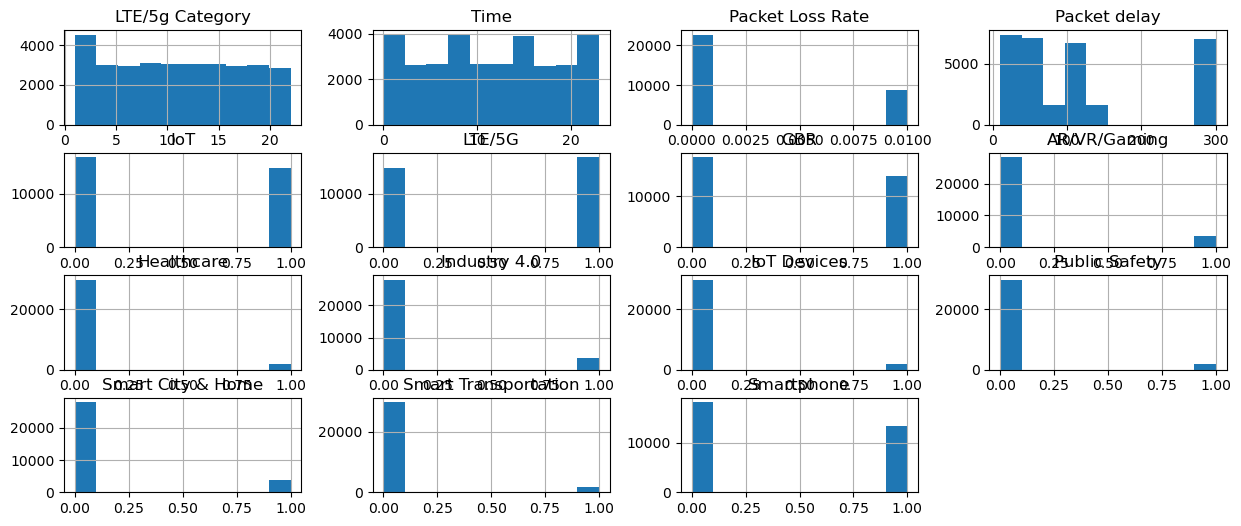

In [5]:
df.hist(figsize=(15, 6))

C:\Users\foxel\anaconda3\envs\EMIA-gpu\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


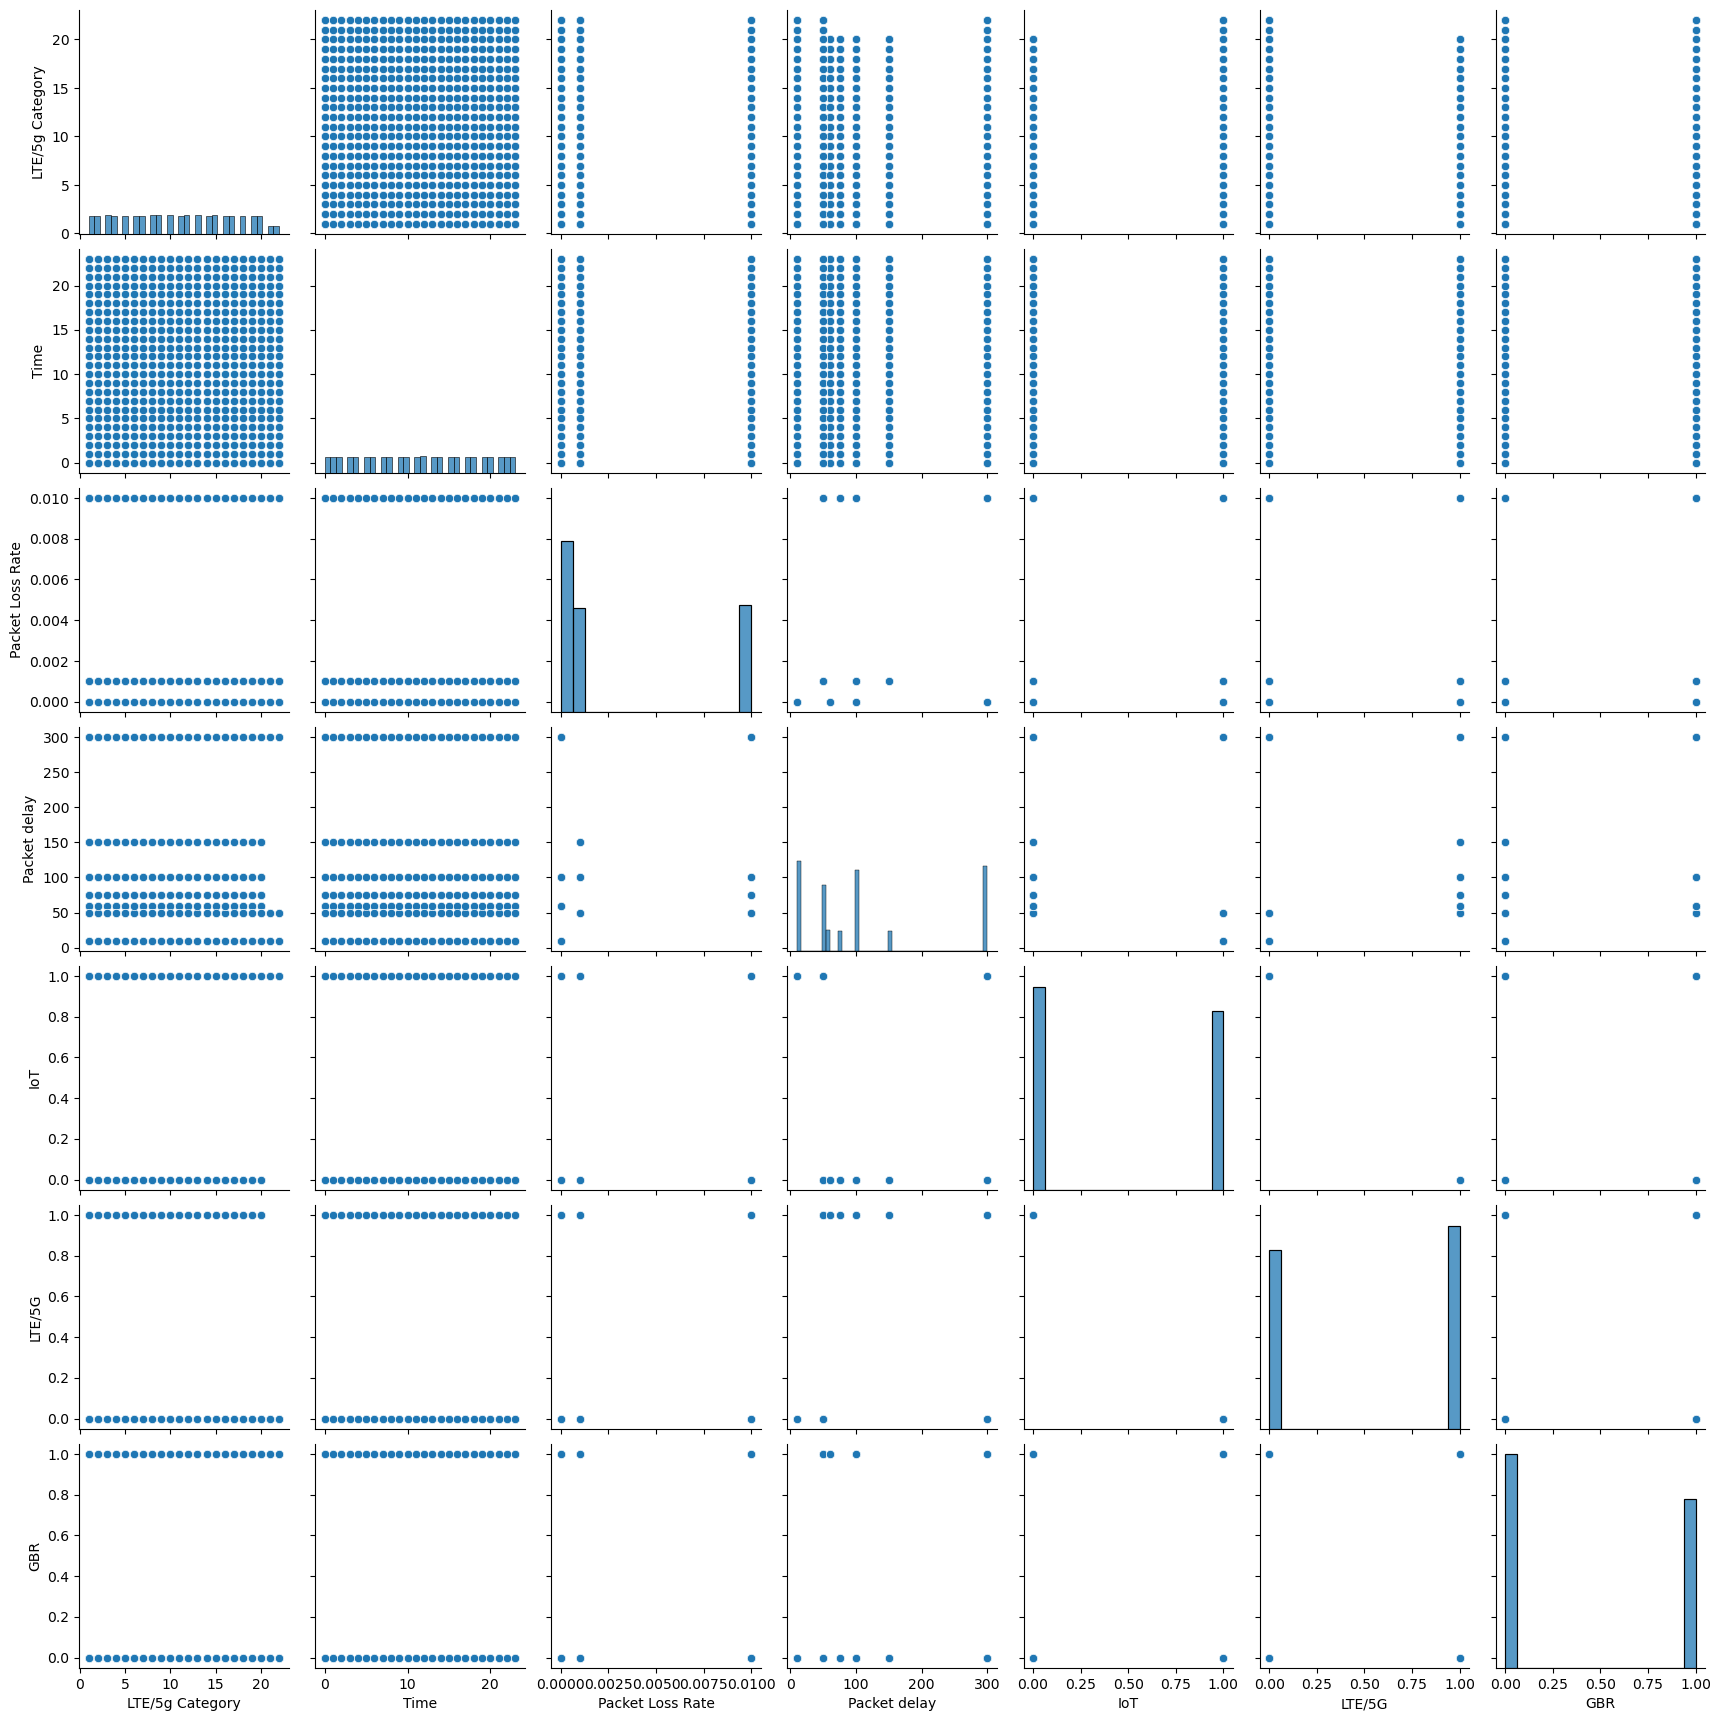

In [6]:
import seaborn as sns 

sns.pairplot(data=df[['LTE/5g Category', 'Time', 'Packet Loss Rate', 'Packet delay', 'IoT',
       'LTE/5G', 'GBR']]);


In [7]:
### Sandardization of data ###
### We does not standardize the Target variable for classification
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
 
# Storing the fit object for later reference
scaler.fit(df)

X_train = scaler.transform(df)
y_train = pd.get_dummies(target_col)


Elapsed time to compute the importances: 0.006 seconds


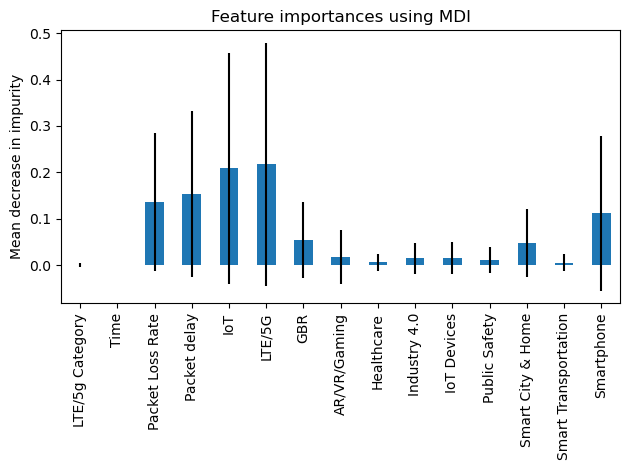

In [14]:
from sklearn.ensemble import RandomForestClassifier

feature_names = df.columns
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

import time
import matplotlib.pyplot as plt

import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [49]:
import tensorflow as tf
num_inputs = len(df.columns)
BATCH_SIZE = 32
EPOCHS = 10

classifier = tf.keras.Sequential()
# Defining the Input layer and FIRST hidden layer,both are same!
# relu means Rectifier linear unit function
classifier.add(tf.keras.layers.Dense(units=10, input_dim=num_inputs, kernel_initializer='uniform', activation='relu'))
 
#Defining the SECOND hidden layer, here we have not defined input because it is
# second layer and it will get input as the output of first hidden layer
classifier.add(tf.keras.layers.Dense(units=6, kernel_initializer='uniform', activation='relu'))
 
# Defining the Output layer
# sigmoid means sigmoid activation function
# for Multiclass classification the activation ='softmax'
# And output_dim will be equal to the number of factor levels
classifier.add(tf.keras.layers.Dense(units=num_classes, kernel_initializer='uniform', activation='softmax'))
 
# Optimizer== the algorithm of SGG to keep updating weights
# loss== the loss function to measure the accuracy
# metrics== the way we will compare the accuracy after each step of SGD
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
# fitting the Neural Network on the training data
survivalANN_Model=classifier.fit(X_train, y_train, batch_size=BATCH_SIZE , epochs=EPOCHS, verbose=1)
 

ValueError: Data cardinality is ambiguous:
  x sizes: 1912
  y sizes: 1532
Make sure all arrays contain the same number of samples.

In [48]:
classifier.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                170       
                                                                 
 dense_16 (Dense)            (None, 6)                 66        
                                                                 
 dense_17 (Dense)            (None, 3)                 21        
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Predictions on testing data
df_test, target_col_test = preprocess("test.csv")

X_test = scaler.transform(df_test)

preds = classifier.predict(X_test)
preds.shape

987/987 [==============================] - 1s 938us/step


(31584, 3)

# Dataset 2

In [19]:
from libs.foxutils.utils.core_utils import settings, datasets_dir
import pandas as pd 
import numpy as np 
from os.path import join as pathjoin 

dataset_name = "networkslicing"
project_name = settings["RUN"]["project_name"]


In [95]:
print(f"Run project {project_name} for data {dataset_name}")
target_name = "slice Type"

def preprocess(filename = "train.csv"):
    datafile = pathjoin(datasets_dir, project_name, dataset_name, filename)
    df = pd.read_csv(datafile, index_col=0)
    if not (target_name in df.columns):
        target_col = None
    else:
        target_col = df[target_name]
        df.drop(columns=[target_name], inplace=True)
    
    df["Use Case"]=df["Use Case"].astype('category').cat.codes
    df["Technology Supported"]=df["Technology Supported"].astype('category').cat.codes
    df["Day"]=df["Day"].astype('category').cat.codes
    df["GBR"]=df["GBR"].astype('category').cat.codes

    #df.drop(columns=["Use Case", "Day", "Time"], inplace=True)
    return df, target_col 

df, target_col = preprocess("train.csv")

num_cols = len(df.columns)
num_rows = len(df)
num_classes = len(np.unique(target_col))

print(f"Num cols: {num_cols}. Num rows: {num_rows}. Num classes: {num_classes}")
print(f"Name cols: {df.columns}")
print(f"Target col: {target_name}")
df.head()


Run project explor for data networkslicing
Num cols: 8. Num rows: 63167. Num classes: 3
Name cols: Index(['Use Case', 'LTE/5g Category', 'Technology Supported', 'Day', 'Time',
       'GBR', 'Packet Loss Rate', 'Packet delay'],
      dtype='object')
Target col: slice Type


,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Packet Loss Rate,Packet delay
1,7,1,1,3,1,1,0.01,100
2,7,1,1,3,2,1,0.01,100
3,7,1,1,3,3,1,0.01,100
4,7,1,1,3,4,1,0.01,100
5,7,1,1,3,5,1,0.01,100


In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LTE/5g Category,63167.0,10.968243,6.064253,1.000000,6.000000,11.000,16.00,22.00
Technology Supported,63167.0,0.531907,0.498985,0.000000,0.000000,1.000,1.00,1.00
GBR,63167.0,0.558504,0.496569,0.000000,0.000000,1.000,1.00,1.00
Packet Loss Rate,63167.0,0.003091,0.004348,0.000001,0.000001,0.001,0.01,0.01
Packet delay,63167.0,114.308737,106.322142,10.000000,50.000000,75.000,150.00,300.00


array([[<Axes: title={'center': 'LTE/5g Category'}>,
        <Axes: title={'center': 'Technology Supported'}>,
        <Axes: title={'center': 'Day'}>],
       [<Axes: title={'center': 'Time'}>,
        <Axes: title={'center': 'GBR'}>,
        <Axes: title={'center': 'Packet Loss Rate'}>],
       [<Axes: title={'center': 'Packet delay'}>, <Axes: >, <Axes: >]],
      dtype=object)

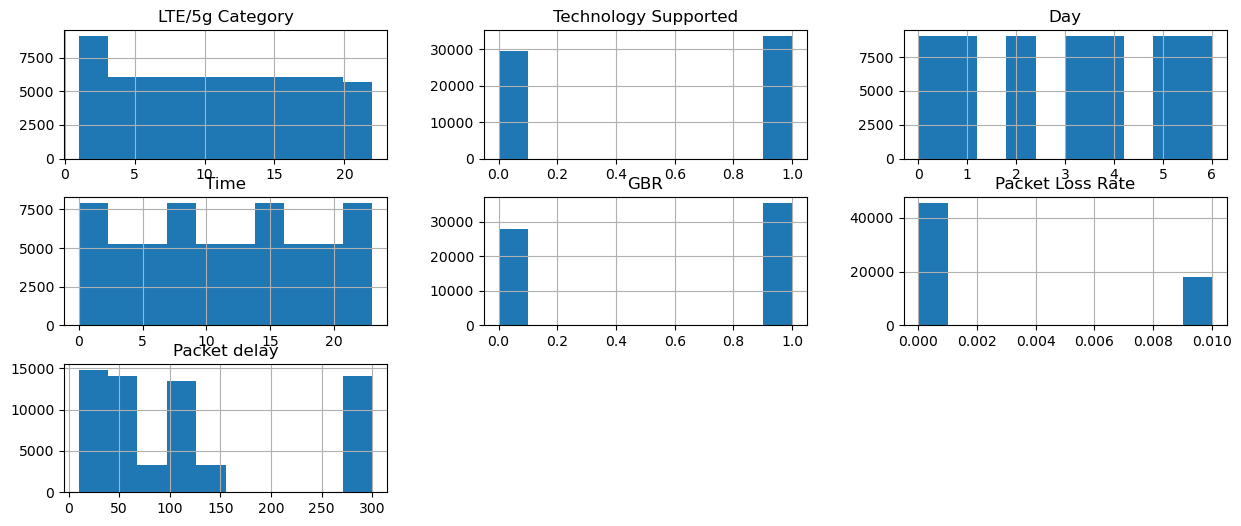

In [82]:
df.hist(figsize=(15, 6))

In [99]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

labels= pd.get_dummies(target_col)

X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, stratify=labels)

### Sandardization of data ###
### We does not standardize the Target variable for classification
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
 
# Storing the fit object for later reference
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.preprocessing import LabelEncoder

y_train_onehot = y_train.idxmax(axis=1)
le = LabelEncoder()
y_train_onehot = le.fit_transform(y_train_onehot)
y_test_onehot = y_test.idxmax(axis=1)
y_test_onehot = le.transform(y_test_onehot)

In [100]:
import seaborn as sns 

df_new = df.copy()
df_new['Label'] = le.transform(target_col)

df_new.corr()

,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Packet Loss Rate,Packet delay,Label
Use Case,1.000000e+00,-3.365154e-02,4.092538e-01,7.907153e-15,2.447910e-05,-2.840951e-02,1.478670e-01,3.011191e-01,6.680423e-02
LTE/5g Category,-3.365154e-02,1.000000e+00,-8.225971e-02,-1.457921e-15,-4.323297e-05,1.035868e-02,1.396936e-02,-1.583651e-02,7.847951e-16
Technology Supported,4.092538e-01,-8.225971e-02,1.000000e+00,1.171573e-14,2.467278e-05,-1.256230e-01,-1.692933e-01,1.924235e-01,-4.439367e-15
Day,7.907153e-15,-1.457921e-15,1.171573e-14,1.000000e+00,7.011970e-18,-1.330768e-15,-5.822830e-16,3.357354e-15,9.615136e-16
Time,2.447910e-05,-4.323297e-05,2.467278e-05,7.011970e-18,1.000000e+00,2.338411e-05,4.178960e-05,-3.539577e-06,6.044244e-17
GBR,-2.840951e-02,1.035868e-02,-1.256230e-01,-1.330768e-15,2.338411e-05,1.000000e+00,1.355706e-02,-4.294413e-01,-5.166787e-01
Packet Loss Rate,1.478670e-01,1.396936e-02,-1.692933e-01,-5.822830e-16,4.178960e-05,1.355706e-02,1.000000e+00,3.122009e-01,6.096061e-01
Packet delay,3.011191e-01,-1.583651e-02,1.924235e-01,3.357354e-15,-3.539577e-06,-4.294413e-01,3.122009e-01,1.000000e+00,5.308839e-01
Label,6.680423e-02,7.847951e-16,-4.439367e-15,9.615136e-16,6.044244e-17,-5.166787e-01,6.096061e-01,5.308839e-01,1.000000e+00


C:\Users\foxel\anaconda3\envs\EMIA-gpu\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


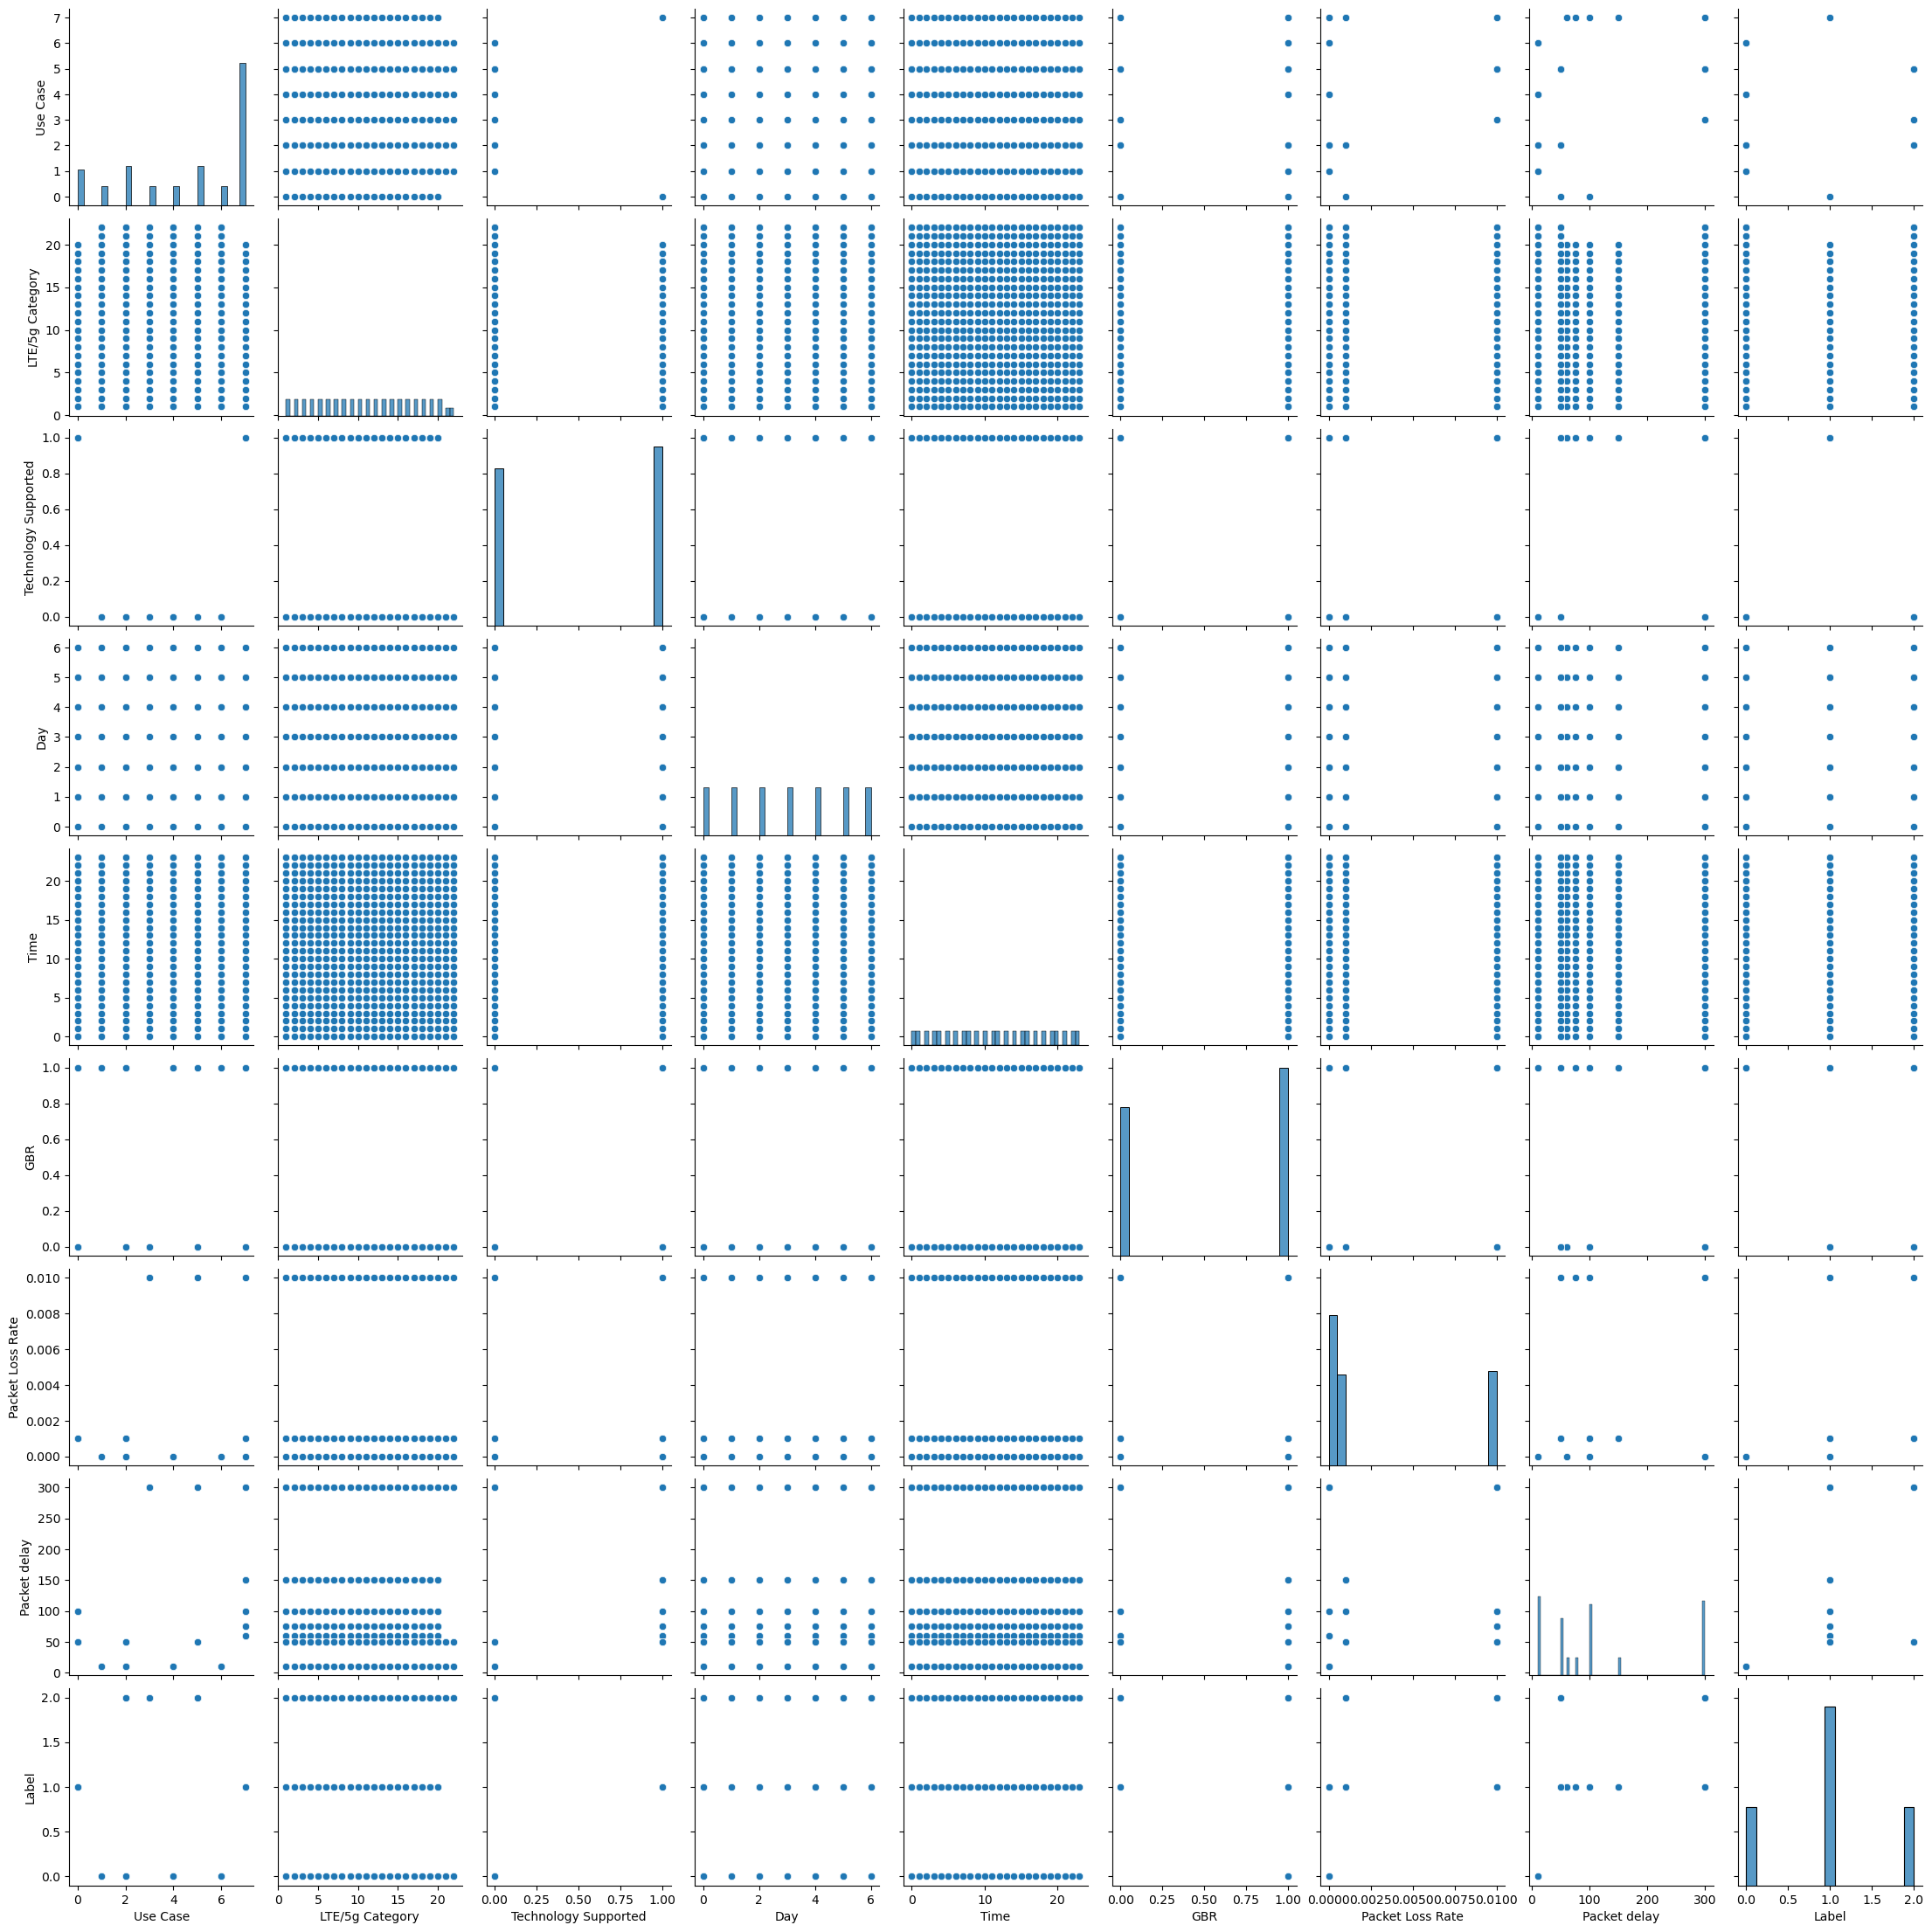

In [79]:

sns.pairplot(data=df_new);

Elapsed time to compute the importances: 0.007 seconds


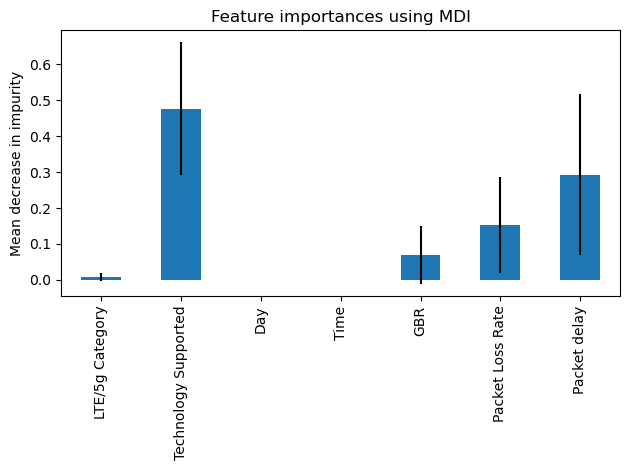

In [88]:
from sklearn.ensemble import RandomForestClassifier

feature_names = df.columns
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

import time
import matplotlib.pyplot as plt

import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train[0:300], y_train_onehot[0:300])

y_pred = clf.predict(X_train)
accuracy = accuracy_score(y_train_onehot, y_pred)
print("Train Accuracy:", accuracy)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test_onehot, y_pred)
print("Test Accuracy:", accuracy)

Train Accuracy: 1.0
Test Accuracy: 1.0


In [101]:
from sklearn.svm import SVC
clf.fit(X_train, y_train_onehot)

y_pred = clf.predict(X_train)
accuracy = accuracy_score(y_train_onehot, y_pred)
print("Train Accuracy:", accuracy)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test_onehot, y_pred)
print("Test Accuracy:", accuracy)

Train Accuracy: 1.0
Test Accuracy: 1.0


In [106]:
import tensorflow as tf
num_inputs = len(df.columns)
BATCH_SIZE = 32
EPOCHS = 10

classifier = tf.keras.Sequential()
# Defining the Input layer and FIRST hidden layer,both are same!
# relu means Rectifier linear unit function
classifier.add(tf.keras.layers.Dense(units=10, input_dim=num_inputs, kernel_initializer='uniform', activation='relu'))
 
#Defining the SECOND hidden layer, here we have not defined input because it is
# second layer and it will get input as the output of first hidden layer
classifier.add(tf.keras.layers.Dense(units=6, kernel_initializer='uniform', activation='relu'))
 
# Defining the Output layer
# sigmoid means sigmoid activation function
# for Multiclass classification the activation ='softmax'
# And output_dim will be equal to the number of factor levels
classifier.add(tf.keras.layers.Dense(units=num_classes, kernel_initializer='uniform', activation='softmax'))
 
# Optimizer== the algorithm of SGG to keep updating weights
# loss== the loss function to measure the accuracy
# metrics== the way we will compare the accuracy after each step of SGD
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
# fitting the Neural Network on the training data
history=classifier.fit(X_train, y_train, batch_size=BATCH_SIZE , epochs=EPOCHS, verbose=1)

Epoch 1/10
1580/1580 [==============================] - 22s 13ms/step - loss: 0.1690 - accuracy: 0.9311
Epoch 2/10
1580/1580 [==============================] - 17s 11ms/step - loss: 4.8128e-04 - accuracy: 1.0000
Epoch 3/10
1580/1580 [==============================] - 17s 11ms/step - loss: 9.7749e-05 - accuracy: 1.0000
Epoch 4/10
1580/1580 [==============================] - 17s 11ms/step - loss: 3.0635e-05 - accuracy: 1.0000
Epoch 5/10
1580/1580 [==============================] - 17s 11ms/step - loss: 1.1071e-05 - accuracy: 1.0000
Epoch 6/10
1580/1580 [==============================] - 17s 11ms/step - loss: 4.2628e-06 - accuracy: 1.0000
Epoch 7/10
1580/1580 [==============================] - 17s 11ms/step - loss: 1.6911e-06 - accuracy: 1.0000
Epoch 8/10
1580/1580 [==============================] - 18s 11ms/step - loss: 6.8475e-07 - accuracy: 1.0000
Epoch 9/10
1580/1580 [==============================] - 18s 11ms/step - loss: 2.7141e-07 - accuracy: 1.0000
Epoch 10/10
1580/1580 [=========

In [107]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                90        
                                                                 
 dense_10 (Dense)            (None, 6)                 66        
                                                                 
 dense_11 (Dense)            (None, 3)                 21        
                                                                 
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________


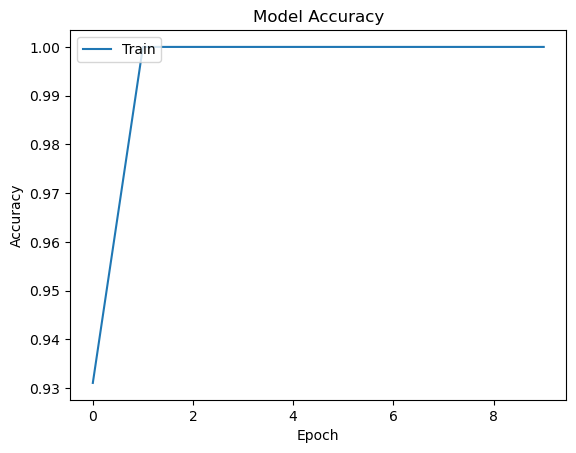

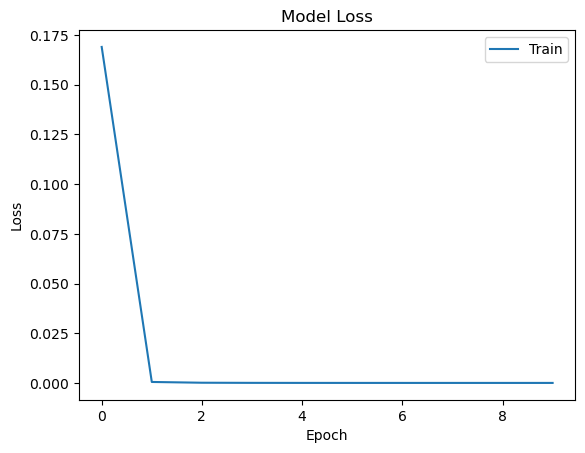

395/395 [==============================] - 5s 10ms/step - loss: 5.2084e-08 - accuracy: 1.0000

accuracy: 100.00%


In [112]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


scores = classifier.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))


In [73]:
y_pred = classifier.predict(X_train).argmax(axis=1)
accuracy = accuracy_score(y_train_onehot, y_pred)
print("Train Accuracy:", accuracy)

y_pred = classifier.predict(X_test).argmax(axis=1)
accuracy = accuracy_score(y_test_onehot, y_pred)
print("Test Accuracy:", accuracy)

1580/1580 [==============================] - 1s 875us/step
Train Accuracy: 1.0
395/395 [==============================] - 0s 953us/step
Test Accuracy: 1.0


# Dataset 3

In [1]:
from libs.foxutils.utils.core_utils import settings, datasets_dir
import pandas as pd 
import numpy as np 
from os.path import join as pathjoin 

dataset_name = "small_cell_nodes"
project_name = settings["RUN"]["project_name"]

In [2]:
print(f"Run project {project_name} for data {dataset_name}")
target_name = "slice Type"

def preprocess(filename = "train.csv"):
    datafile = pathjoin(datasets_dir, project_name, dataset_name, filename)
    df = pd.read_csv(datafile, index_col=None)
    if not (target_name in df.columns):
        target_col = None
    else:
        target_col = df[target_name]
        df.drop(columns=[target_name], inplace=True)
    
    #df["Use Case"]=df["Use Case"].astype('category').cat.codes

    return df, target_col 

df, target_col = preprocess("train.csv")

num_cols = len(df.columns)
num_rows = len(df)
num_classes = len(np.unique(target_col))

print(f"Num cols: {num_cols}. Num rows: {num_rows}. Num classes: {num_classes}")
print(f"Name cols: {df.columns}")
print(f"Target col: {target_name}")
df.head()

Run project explor for data small_cell_nodes
Num cols: 22. Num rows: 2391. Num classes: 1
Name cols: Index(['OWNERNAME', 'APPLICANTCOMPANYNAME', 'PERMITMASTERNUMBER',
       'PERMITREFNUMBER', 'NODEGROUP', 'NODEID', 'NODEADDRESS', 'NODE_N',
       'NODE_E', 'NODETYPE', 'STATUS', 'POLEMATERIAL', 'POLEMANUFACTURER',
       'POLEMODEL', 'POLEHEIGHT_FT', 'POLECOLOR', 'RFEQUIPMENT', 'INTENDEDUSE',
       'ASSETOWNER', 'SITEID', 'FIXEDASSETID', 'COUNCIL_DISTRICT'],
      dtype='object')
Target col: slice Type


,OWNERNAME,APPLICANTCOMPANYNAME,PERMITMASTERNUMBER,PERMITREFNUMBER,NODEGROUP,NODEID,NODEADDRESS,NODE_N,NODE_E,NODETYPE,...,POLEMANUFACTURER,POLEMODEL,POLEHEIGHT_FT,POLECOLOR,RFEQUIPMENT,INTENDEDUSE,ASSETOWNER,SITEID,FIXEDASSETID,COUNCIL_DISTRICT
0,Mobilitie,Mobilitie,NaN,NaN,2018 Group 1A,DN90XS379E,1692 Glenarm PL,39.744554,-104.989407,"Type 3A, Combo Pole w/Cantenna",...,CompTek,1002661,30.0,Federal Green (RAL 6012),CCI SCA-DR1-65F6-E-H2S-K(Panel Ant),Single Carrier,,NaN,NaN,9
1,Mobilitie,Mobilitie,NaN,NaN,2018 Group 3\r\n,DN90XS381B\r\n,1652 N. Lincoln St.\r\n,39.742565,-104.985513,"Type 1A, Utility Pole Mounted",...,Other,TBD by Xcel\r\n,34.0,,Alpha AW3477-S (Omni B41),Single Carrier,,NaN,NaN,10
2,Mobilitie,Mobilitie,NaN,NaN,2018 Group 1A\r\n,DN90XSG53C\r\n,1688 Welton St.\r\n,39.745220,-104.990277,"Type 3A, Combo Pole w/Cantenna",...,CompTek,1002661,30.0,Federal Green (RAL 6012),CCI SCA-DR1-65F6-E-H2S-K(Panel Ant),Single Carrier,,NaN,NaN,9
3,Mobilitie,Mobilitie,NaN,NaN,2018 Group 1A\r\n,DN90XSH39C\r\n,1231 Glenarm PL.\r\n,39.740519,-104.994896,"Type 3A, Combo Pole w/Cantenna",...,CompTek,1002661,30.0,Federal Green (RAL 6012),CCI SCA-DR1-65F6-E-H2S-K(Panel Ant),Single Carrier,,NaN,NaN,9
4,Mobilitie,Mobilitie,NaN,NaN,2018 Group 1B\r\n,DN90XSH55D\r\n,1461 N. Delaware St.\r\n,39.739439,-104.993035,"Type 3A, Combo Pole w/Cantenna",...,CompTek,1002661,30.0,Federal Green (RAL 6012),CCI SCA-DR1-65F6-E-H2S-K(Panel Ant),Single Carrier,,NaN,NaN,10


In [3]:
df = (
    df.loc[:,['OWNERNAME','NODE_N','NODE_E','APPLICANTCOMPANYNAME', 'NODETYPE', 'STATUS']]
    .dropna()
)

df.head()

,OWNERNAME,NODE_N,NODE_E,APPLICANTCOMPANYNAME,NODETYPE,STATUS
0,Mobilitie,39.744554,-104.989407,Mobilitie,"Type 3A, Combo Pole w/Cantenna",Existing
1,Mobilitie,39.742565,-104.985513,Mobilitie,"Type 1A, Utility Pole Mounted",Existing
2,Mobilitie,39.745220,-104.990277,Mobilitie,"Type 3A, Combo Pole w/Cantenna",Existing
3,Mobilitie,39.740519,-104.994896,Mobilitie,"Type 3A, Combo Pole w/Cantenna",Existing
4,Mobilitie,39.739439,-104.993035,Mobilitie,"Type 3A, Combo Pole w/Cantenna",Existing


In [4]:
from utils import split_train_test, exploratory_analysis, encode_labels

labels = df['STATUS']
df2 = df.copy()

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df2['OWNERNAME'] = label_encoder.fit_transform(df2['OWNERNAME'])
df2['APPLICANTCOMPANYNAME'] = label_encoder.fit_transform(df2['APPLICANTCOMPANYNAME'])
df2['NODETYPE'] = label_encoder.fit_transform(df2['NODETYPE'])
df2['STATUS'] = label_encoder.fit_transform(df2['STATUS'])

X_train, X_test, y_train, y_test = split_train_test(df2, labels, test_size=0.2)
le, y_train_onehot, y_test_onehot = encode_labels(y_train, y_test)
#exploratory_analysis(X_train, y_train_onehot)

In [5]:
np.unique(df['APPLICANTCOMPANYNAME'])

array(['BV', 'Crown Castle', 'Mobilitie', 'Smartlink', 'Verizon Wireless',
       'Zayo Group, LLC'], dtype=object)

In [6]:
np.unique(df['OWNERNAME'])

array(['ATT', 'Crown Castle', 'Mobilitie', 'VERIZON', 'Zayo Group, LLC'],
      dtype=object)

In [7]:
np.unique(df['NODETYPE'])

array(['Type 1A, Utility Pole Mounted',
       'Type 1B, Utility Pole Strand Mounted',
       'Type 2, Wood Street Light Mounted',
       'Type 3A, Combo Pole w/Cantenna',
       'Type 3B, Combo Pole w/External Shroud',
       'Type 3C, Combo Pole w/Cantenna, External Shroud',
       'Type 4, Single-Carrier Freestanding Pole',
       'Type 6A, Multi-Tenant Freestanding Pole A'], dtype=object)

In [8]:
np.unique(df['STATUS'])

array(['Existing', 'Future Planned 1-2 Year', 'Future Planned 1-2 year',
       'Installed', 'Proposed'], dtype=object)

In [9]:
ids = [x for (x,y) in zip(df.index, df["STATUS"]) if (y != "Proposed")]
df_existing = df.iloc[ids]
#target_col = target_col[ids]

num_cols = len(df_existing.columns)
num_rows = len(df_existing)
print(f"Num cols: {num_cols}. Num rows: {num_rows}.")


Num cols: 6. Num rows: 909.


In [14]:
import folium as fl

m = fl.Map(location=[39.742793, -105.0109598],zoom_start=11)

for lat,long,owner in zip(df_existing.NODE_N,df_existing.NODE_E,df.OWNERNAME):
    fl.Marker([lat,long],popup=owner).add_to(m)

m

In [15]:

from folium.plugins import HeatMap

heat = fl.Map(location=[39.742793, -105.0109598],zoo_start=11)

data = [[lat,long] for lat,long in zip(df_existing.NODE_N,df_existing.NODE_E)]

HeatMap(data,radius=15).add_to(heat)

heat

In [16]:
# Proposed 

ids = [x for (x,y) in zip(df.index, df["STATUS"]) if (y == "Proposed")]
df_proposed = df.iloc[ids]
#target_col = target_col[ids]

num_cols = len(df_proposed.columns)
num_rows = len(df_proposed)
print(f"Num cols: {num_cols}. Num rows: {num_rows}.")

heat = fl.Map(location=[39.742793, -105.0109598],zoo_start=11)

data = [[lat,long] for lat,long in zip(df_proposed.NODE_N,df_proposed.NODE_E)]

HeatMap(data,radius=15).add_to(heat)

heat

Num cols: 6. Num rows: 1482.


In [18]:
def get_label(val):
    if val == "Proposed": 
        return 1
    elif val == "Future Planned 1-2 Year": 
        return 0
    elif val == "Future Planned 1-2 year": 
        return 0
    else: 
        return 2 
    
df["proposed"] = [ get_label(x) for x in df["STATUS"]]
df = df[df["proposed"] < 2]
df.reset_index(inplace=True)

In [19]:
NEAREST = 5 

import numpy as np

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

def calculate_distances(nodes_n, nodes_e):
    dim = len(nodes_n)
    assert dim > 0
    dist = np.zeros((dim,dim))

    for i in range(dim):
        for j in range(i+1):
            dist[i][j] = euclidean_distance([nodes_n[i], nodes_e[i]], [nodes_n[j], nodes_e[j]]) 
            dist[j][i] = euclidean_distance([nodes_n[i], nodes_e[i]], [nodes_n[j], nodes_e[j]]) 

    return dist

def find_nearest(index, dist_, df_):
    distances = dist[index][:]
    sort_index = np.argsort(distances)[1:NEAREST+1] #ignore itself
    nearest = df.iloc[sort_index]
    vals = [[x,y] for (x,y) in zip(nearest["NODE_N"], nearest["NODE_E"])]
    vals = [item for row in vals for item in row]
    ids = list(nearest.index.values)
    return (vals, ids)

datafile = pathjoin(datasets_dir, project_name, dataset_name, 'distances.npy')
#dist = calculate_distances(df["NODE_N"].values, df["NODE_E"].values)
#np.save(datafile, dist) # save

dist = np.load(datafile) # load

nearest_pairs = [find_nearest(x,dist,df) for x in range(len(df))]
connections  = [ {"target": y[1][i], "source":x} for (x,y)  in zip(range(len(df)), nearest_pairs) for i in range(NEAREST)]
connections = pd.DataFrame(connections)
connections.head()

,target,source
0,961,0
1,1559,0
2,1264,0
3,105,0
4,1599,0


In [20]:
features = pd.DataFrame([{'feat_' + str(i): y[0][i] for i in range(NEAREST*2)} for (x,y)  in zip(range(len(df)), nearest_pairs) ])
features["node_n"] = df["NODE_N"]
features["node_e"] = df["NODE_E"]
features["name"] = df.index
features["proposed"] = df["proposed"]


print(f"Length {len(features)}")
features.head()

Length 1916


,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,node_n,node_e,name,proposed
0,39.715856,-104.940564,39.713202,-104.940555,39.718753,-104.940880,39.711630,-104.943136,39.711412,-104.942781,39.715104,-104.940872,0,0
1,39.721318,-104.940876,39.718753,-104.940880,39.719346,-104.943216,39.724087,-104.940871,39.721604,-104.945021,39.720317,-104.940894,1,0
2,39.731099,-104.940098,39.731216,-104.942966,39.728604,-104.938246,39.732855,-104.943938,39.727373,-104.944077,39.730652,-104.940534,2,0
3,39.659151,-104.940419,39.663825,-104.945308,39.668474,-104.942957,39.661333,-104.931774,39.671137,-104.945472,39.663083,-104.940541,3,0
4,39.652941,-104.929025,39.659049,-104.923464,39.653195,-104.930661,39.646888,-104.922379,39.646358,-104.922387,39.653204,-104.924379,4,0


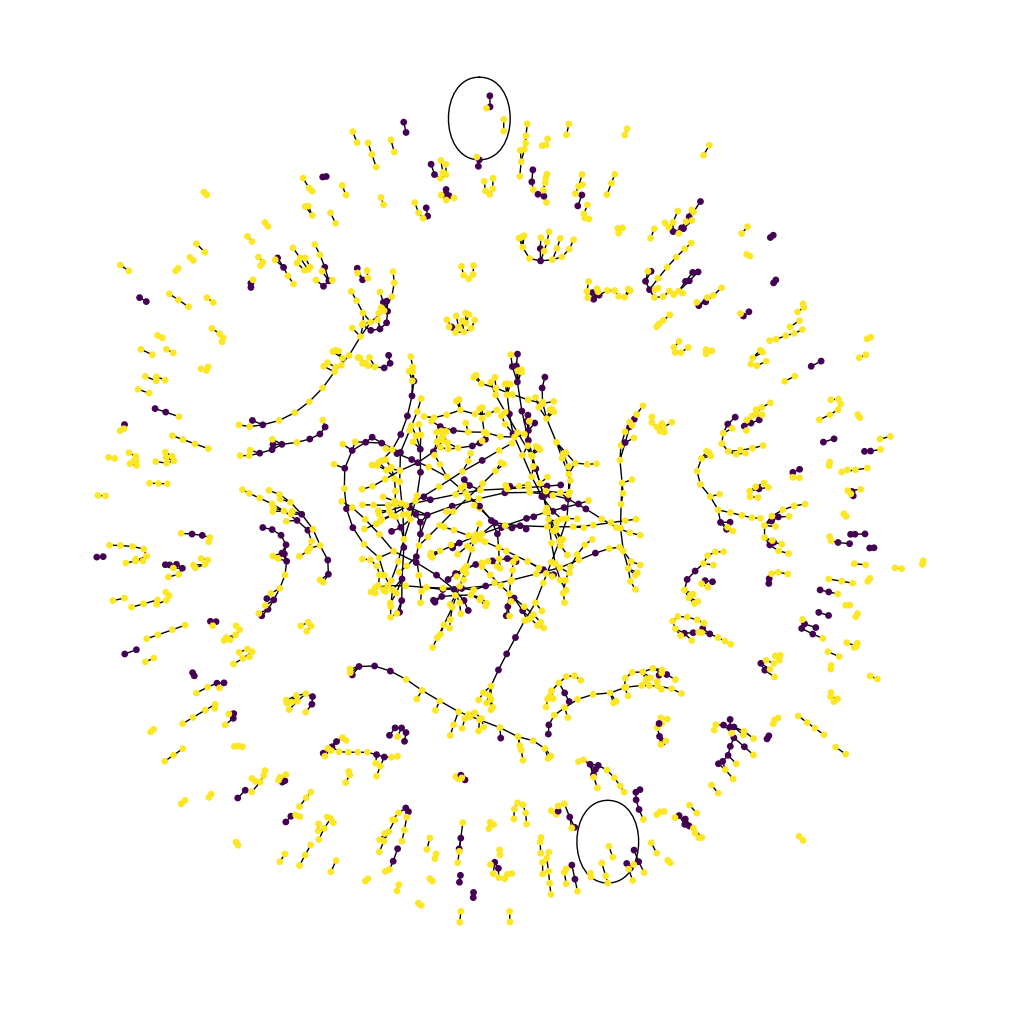

In [21]:
import matplotlib.pyplot as plt
import networkx as nx

def is_valid_name(x, vals):
    return x in vals

plt.figure(figsize=(10, 10))
colors = features["proposed"].tolist()
samples = connections.sample(n=1500)
ids = [is_valid_name(x, list(features["name"])) for x in samples["source"]]
samples = samples.iloc[ids]
ids = [is_valid_name(x, list(features["name"])) for x in samples["target"]]
samples = samples.iloc[ids]
cora_graph = nx.from_pandas_edgelist(samples)
labels = list(features[features["name"].isin(list(cora_graph.nodes))]["proposed"])
nx.draw_spring(cora_graph, node_size=15, node_color=labels)

In [22]:
from sklearn.model_selection import train_test_split

train_data, test_data, y_train, y_test = train_test_split(features, features.proposed,  test_size=0.2, stratify=features.proposed, 
                                                          shuffle=True, random_state=42)
print("Total data shape:", len(labels))
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Total data shape: 1547
Train data shape: (1532, 14)
Test data shape: (384, 14)


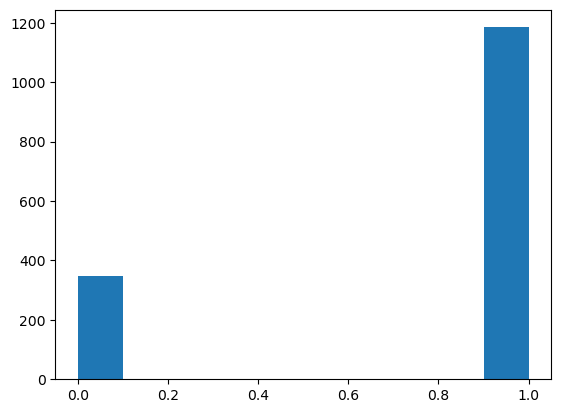

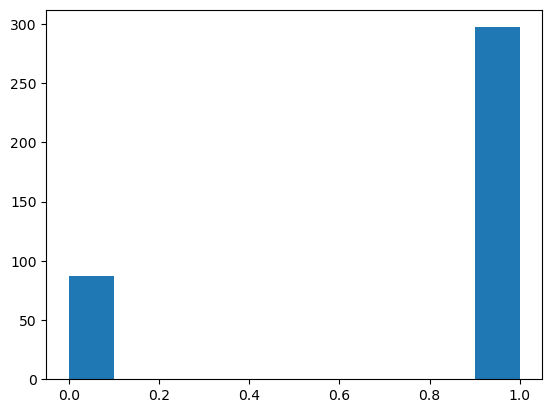

In [23]:
import matplotlib.pyplot as plt

plt.hist(y_train)
plt.show() 

plt.hist(y_test)
plt.show() 

Model: "baseline"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_features (InputLayer)    [(None, 12)]         0           []                               
                                                                                                  
 ffn_block1 (Sequential)        (None, 16)           592         ['input_features[0][0]']         
                                                                                                  
 ffn_block2 (Sequential)        (None, 16)           672         ['ffn_block1[0][0]']             
                                                                                                  
 skip_connection2 (Add)         (None, 16)           0           ['ffn_block1[0][0]',             
                                                                  'ffn_block2[0][0]']      

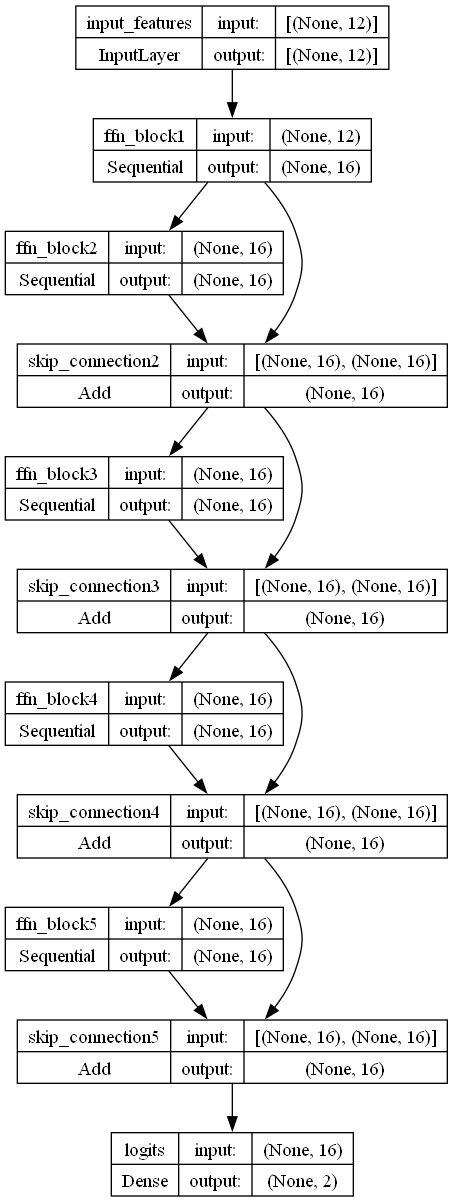

In [107]:
from utils.gnn import create_baseline_model, run_experiment, display_learning_curves, hidden_units, dropout_rate
import tensorflow.keras as keras
import tensorflow as tf

feature_names = set(features.columns) - {"name", "proposed"}
num_features = len(feature_names)
num_classes = 2

# Create train and test features as a numpy array.
x_train = train_data[list(feature_names)].to_numpy()
x_test = test_data[list(feature_names)].to_numpy()
# Create train and test targets as a numpy array.
y_train = train_data["proposed"]
y_test = test_data["proposed"]

# Baseline 
baseline_model = create_baseline_model(hidden_units, num_features, num_classes, dropout_rate)
baseline_model.summary()

from tensorflow.keras.utils import plot_model

plot_model(baseline_model,
           to_file='baseline.png',
           show_shapes=True,
           show_layer_names=True)


Epoch 1/100
5/5 [==============================] - 3s 106ms/step - loss: 0.8823 - acc: 0.6567 - val_loss: 30.2788 - val_acc: 0.1826
Epoch 2/100
5/5 [==============================] - 0s 28ms/step - loss: 0.5695 - acc: 0.6763 - val_loss: 0.5658 - val_acc: 0.8174
Epoch 3/100
5/5 [==============================] - 0s 26ms/step - loss: 0.5288 - acc: 0.7547 - val_loss: 0.5515 - val_acc: 0.8174
Epoch 4/100
5/5 [==============================] - 0s 24ms/step - loss: 0.5320 - acc: 0.7285 - val_loss: 0.4769 - val_acc: 0.8174
Epoch 5/100
5/5 [==============================] - 0s 25ms/step - loss: 0.5455 - acc: 0.7099 - val_loss: 0.6139 - val_acc: 0.3413
Epoch 6/100
5/5 [==============================] - 0s 26ms/step - loss: 0.5445 - acc: 0.7444 - val_loss: 0.4548 - val_acc: 0.8174
Epoch 7/100
5/5 [==============================] - 0s 19ms/step - loss: 0.5502 - acc: 0.7229 - val_loss: 0.4404 - val_acc: 0.8174
Epoch 8/100
5/5 [==============================] - 0s 26ms/step - loss: 0.5187 - acc: 0.

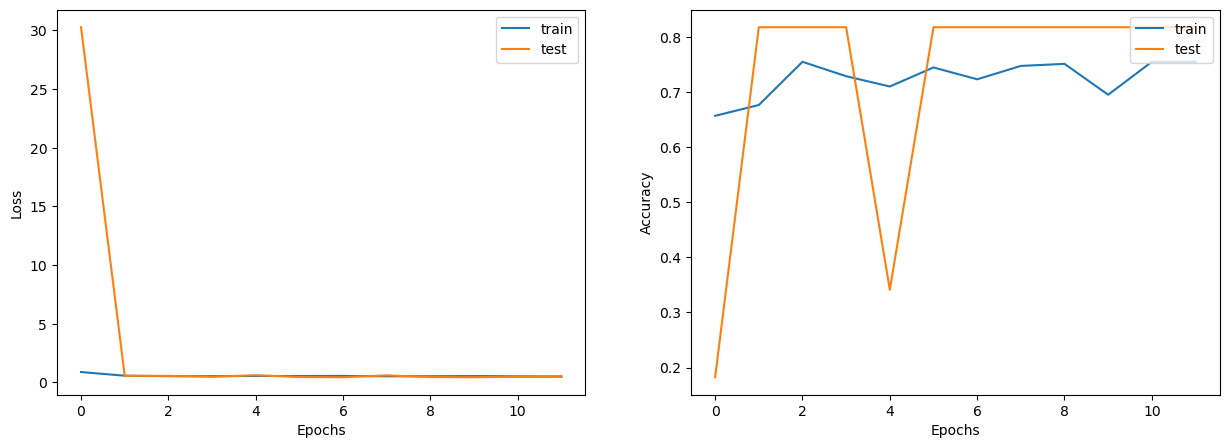

Test accuracy: 77.34%
1/1 [==============================] - 0s 209ms/step
Instance 1:
- existing: 48.12%
- proposed: 51.88%
Instance 2:
- existing: 48.12%
- proposed: 51.88%


In [108]:
history = run_experiment(baseline_model, x_train, y_train)

display_learning_curves(history)
_, test_accuracy = baseline_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

class_idx = [0, 1]
class_values = ['existing', 'proposed']

def generate_random_instances(num_instances):
    token_probability = x_train.mean(axis=0)
    instances = []
    for _ in range(num_instances):
        probabilities = np.random.uniform(size=len(token_probability))
        instance = (probabilities <= token_probability).astype(int)
        instances.append(instance)

    return np.array(instances)


def display_class_probabilities(probabilities):
    for instance_idx, probs in enumerate(probabilities):
        print(f"Instance {instance_idx + 1}:")
        for class_idx, prob in enumerate(probs):
            print(f"- {class_values[class_idx]}: {round(prob * 100, 2)}%")
            
new_instances = generate_random_instances(num_classes)
logits = baseline_model.predict(new_instances)
probabilities = keras.activations.softmax(tf.convert_to_tensor(logits)).numpy()
display_class_probabilities(probabilities)

Edges shape: (2, 9580)
Nodes shape: (1916, 12)
GNN output shape: tf.Tensor(
[[-12.290935  11.848833]
 [-12.289728  11.848284]
 [-12.289743  11.84997 ]], shape=(3, 2), dtype=float32)
Model: "gnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess (Sequential)     (1916, 16)                592       
                                                                 
 graph_conv1 (GraphConvLayer  multiple                 1664      
 )                                                               
                                                                 
 graph_conv2 (GraphConvLayer  multiple                 1664      
 )                                                               
                                                                 
 postprocess (Sequential)    (1916, 16)                672       
                                                                 
 logits

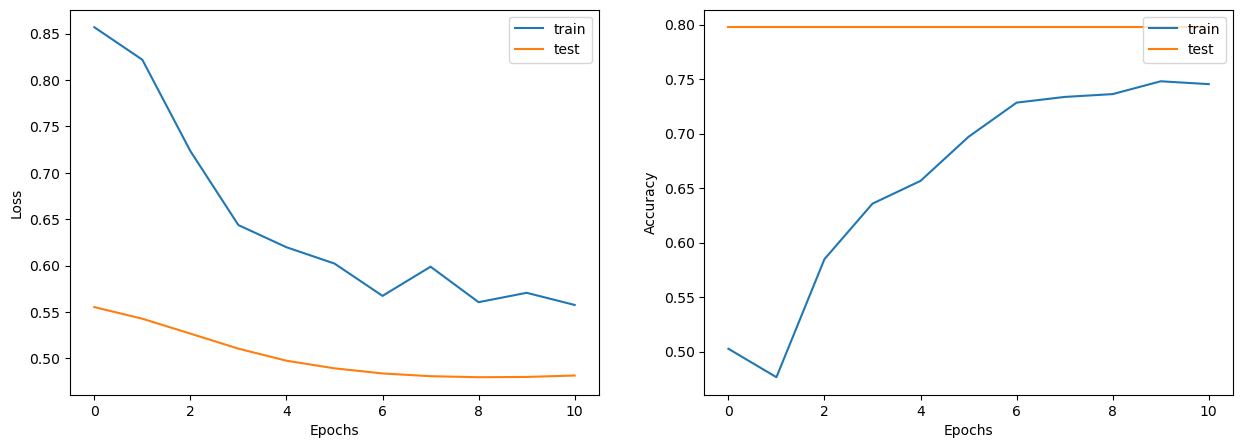

Test accuracy: 77.34%


In [126]:
# GNN
#https://keras.io/examples/graph/gnn_citations/

from utils.gnn import GNNNodeClassifier, optimizer, run_experiment
# optimizer = keras.optimizers.RMSprop(learning_rate=3e-1, momentum=momentum)


# Create an edges array (sparse adjacency matrix) of shape [2, num_edges].
edges = connections[["source", "target"]].to_numpy().T
# Create an edge weights array of ones.
edge_weights = tf.ones(shape=edges.shape[1])
# Create a node features array of shape [num_nodes, num_features].
node_features = tf.cast(
    features.sort_values("name")[list(feature_names)].to_numpy(), dtype=tf.dtypes.float32
)
# Create graph info tuple with node_features, edges, and edge_weights.
graph_info = (node_features, edges, edge_weights)

print("Edges shape:", edges.shape)
print("Nodes shape:", node_features.shape)


gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="gnn_model",
)

print("GNN output shape:", gnn_model([1, num_classes, 100]))

gnn_model.summary()

#import visualkeras
#visualkeras.layered_view(gnn_model, to_file='gat.png').show() # write and show

plot_model(gnn_model, to_file='gnn.png', show_shapes=True, show_layer_names=True)

x_train = train_data.name.to_numpy()
history = run_experiment(gnn_model, x_train, y_train)


display_learning_curves(history)
x_test = test_data.name.to_numpy()
_, test_accuracy = gnn_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

In [125]:
import importlib
from utils import gnn 
importlib.reload(gnn)

from utils.gnn import optimizer, run_experiment
optimizer

Edges shape:		 (9580, 2)
Node features shape: (1916, 12)
Epoch 1/100
6/6 [==============================] - 12s 454ms/step - loss: 525755.1250 - acc: 0.5922 - val_loss: 2540.8188 - val_acc: 0.8043
Epoch 2/100
6/6 [==============================] - 0s 63ms/step - loss: 7512.4033 - acc: 0.6882 - val_loss: 8017.4385 - val_acc: 0.8043
Epoch 3/100
6/6 [==============================] - 0s 48ms/step - loss: 5730.1035 - acc: 0.7112 - val_loss: 735.2762 - val_acc: 0.7826
Epoch 4/100
6/6 [==============================] - 0s 48ms/step - loss: 953.4572 - acc: 0.7166 - val_loss: 674.4165 - val_acc: 0.8043
Epoch 5/100
6/6 [==============================] - 0s 50ms/step - loss: 718.6528 - acc: 0.7166 - val_loss: 333.4667 - val_acc: 0.8043
Epoch 6/100
6/6 [==============================] - 0s 52ms/step - loss: 304.5614 - acc: 0.7550 - val_loss: 1289.0453 - val_acc: 0.8043
Epoch 7/100
6/6 [==============================] - 0s 49ms/step - loss: 732.6989 - acc: 0.7811 - val_loss: 247.3672 - val_acc: 0.

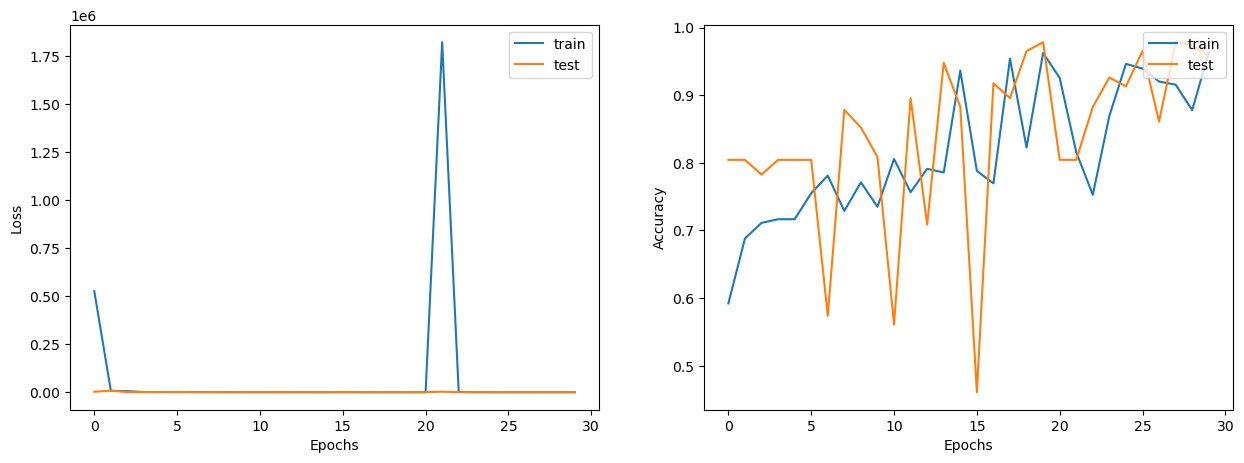

Test accuracy: 96.61%


In [78]:
# GAT  
#https://keras.io/examples/graph/gat_node_classification/
from utils.gnn import GraphAttentionNetwork, optimizer
#optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)


# Define graph, namely an edge tensor and a node feature tensor
edges = tf.convert_to_tensor(connections[["target", "source"]])
node_states = tf.convert_to_tensor(features.sort_values("name").iloc[:, 1:-1])

# Print shapes of the graph
print("Edges shape:\t\t", edges.shape)
print("Node features shape:", node_states.shape)

# Obtain paper indices which will be used to gather node states
# from the graph later on when training the model
train_indices = train_data["name"].to_numpy()
test_indices = test_data["name"].to_numpy()

# Obtain ground truth labels corresponding to each paper_id
train_labels = y_train.to_numpy()
test_labels = y_test.to_numpy()



# Define hyper-parameters
HIDDEN_UNITS = 100
NUM_HEADS = 8
NUM_LAYERS = 3
OUTPUT_DIM = len(class_values)


# Build model
gat_model = GraphAttentionNetwork(
    node_states, edges, HIDDEN_UNITS, NUM_HEADS, NUM_LAYERS, OUTPUT_DIM, optimizer,
)

gat_model.summary()


#x_train = train_data.name.to_numpy()
history = run_experiment(gat_model, train_indices, train_labels)


display_learning_curves(history)
#x_test = test_data.name.to_numpy()
_, test_accuracy = gat_model.evaluate(x=test_indices, y=test_labels, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")


In [127]:
gat_model.summary()


Model: "graph_attention_network_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            multiple                  10400     
                                                                 
 multi_head_graph_attention_  multiple                 641600    
 45 (MultiHeadGraphAttention                                     
 )                                                               
                                                                 
 multi_head_graph_attention_  multiple                 641600    
 46 (MultiHeadGraphAttention                                     
 )                                                               
                                                                 
 multi_head_graph_attention_  multiple                 641600    
 47 (MultiHeadGraphAttention                                     
 )                                      

# Dataset 4

In [9]:
from libs.foxutils.utils.core_utils import settings, datasets_dir
import pandas as pd 
import numpy as np 
from os.path import join as pathjoin 

dataset_name = "deep-slice"
project_name = settings["RUN"]["project_name"]

In [10]:
print(f"Run project {project_name} for data {dataset_name}")
target_name = "Slice Type"

def preprocess(filename = "train.csv"):
    datafile = pathjoin(datasets_dir, project_name, dataset_name, filename)
    df = pd.read_excel(datafile, sheet_name='Model_Inputs_Outputs', index_col=None)
    df.rename(columns={x: x.split(" (")[0] for x in df.columns}, inplace=True)

    if not (target_name in df.columns):
        target_col = None
    else:
        target_col = df[target_name]
        df.drop(columns=[target_name], inplace=True)
        
    df.drop(columns=["Unnamed: 0"], inplace=True)
    df["Use CaseType"]=df["Use CaseType"].astype('category').cat.codes
    df["Packet Delay Budget"]=df["Packet Delay Budget"].astype('category').cat.codes
    df["Technology Supported"]=df["Technology Supported"].astype('category').cat.codes
    df["LTE/5G UE Category"]=df["LTE/5G UE Category"].astype('category').cat.codes
    df["Day"]=df["Day"].astype('category').cat.codes

    return df, target_col 

df, target_col = preprocess("5G_Dataset_Network_Slicing_CRAWDAD_Shared.xlsx")

num_cols = len(df.columns)
num_rows = len(df)
num_classes = len(np.unique(target_col))

print(f"Num cols: {num_cols}. Num rows: {num_rows}. Num classes: {num_classes}")
print(f"Name cols: {df.columns}")
print(f"Target col: {target_name}")
df.head()

Run project explor for data deep-slice
Num cols: 8. Num rows: 466739. Num classes: 3
Name cols: Index(['Use CaseType', 'LTE/5G UE Category', 'Technology Supported', 'Day',
       'Time', 'QCI', 'Packet Loss Rate', 'Packet Delay Budget'],
      dtype='object')
Target col: Slice Type


,Use CaseType,LTE/5G UE Category,Technology Supported,Day,Time,QCI,Packet Loss Rate,Packet Delay Budget
0,7,1,1,1,1,1,0.01,2
1,7,1,1,1,1,2,0.01,2
2,7,1,1,1,1,3,0.01,2
3,7,1,1,1,1,4,0.01,2
4,7,1,1,1,1,65,0.01,2


In [11]:
df.head()

,Use CaseType,LTE/5G UE Category,Technology Supported,Day,Time,QCI,Packet Loss Rate,Packet Delay Budget
0,7,1,1,1,1,1,0.01,2
1,7,1,1,1,1,2,0.01,2
2,7,1,1,1,1,3,0.01,2
3,7,1,1,1,1,4,0.01,2
4,7,1,1,1,1,65,0.01,2


In [12]:
import importlib
import utils
importlib.reload(utils)

<module 'utils' from 'D:\\git\\github\\ic\\EXPLOR_network_slicing\\utils\\__init__.py'>



Describing pandas dataframe
                         count       mean        std       min       25%  \
Use CaseType          373391.0   3.358603   2.479774  0.000000  1.000000   
LTE/5G UE Category    373391.0  10.546363   5.862535  0.000000  5.000000   
Technology Supported  373391.0   0.358828   0.479657  0.000000  0.000000   
Day                   373391.0   3.001722   1.999014  0.000000  1.000000   
Time                  373391.0  12.006237   6.639469  1.000000  6.000000   
QCI                   373391.0  24.229226  28.952207  1.000000  4.000000   
Packet Loss Rate      373391.0   0.003987   0.004642  0.000001  0.000001   
Packet Delay Budget   373391.0   0.908763   0.893674  0.000000  0.000000   

                         50%    75%    max  
Use CaseType           3.000   6.00   7.00  
LTE/5G UE Category    11.000  16.00  22.00  
Technology Supported   0.000   1.00   1.00  
Day                    3.000   5.00   6.00  
Time                  12.000  18.00  23.00  
QCI            

C:\Users\foxel\anaconda3\envs\EMIA-gpu\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)




Prepare random forest importance
Elapsed time to compute the importances: 0.012 seconds


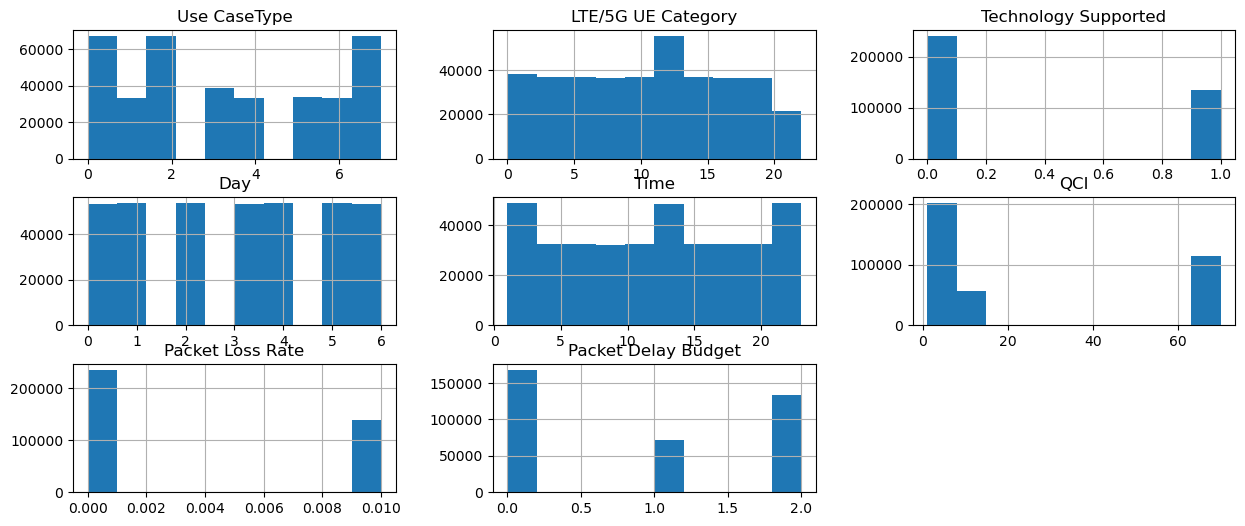

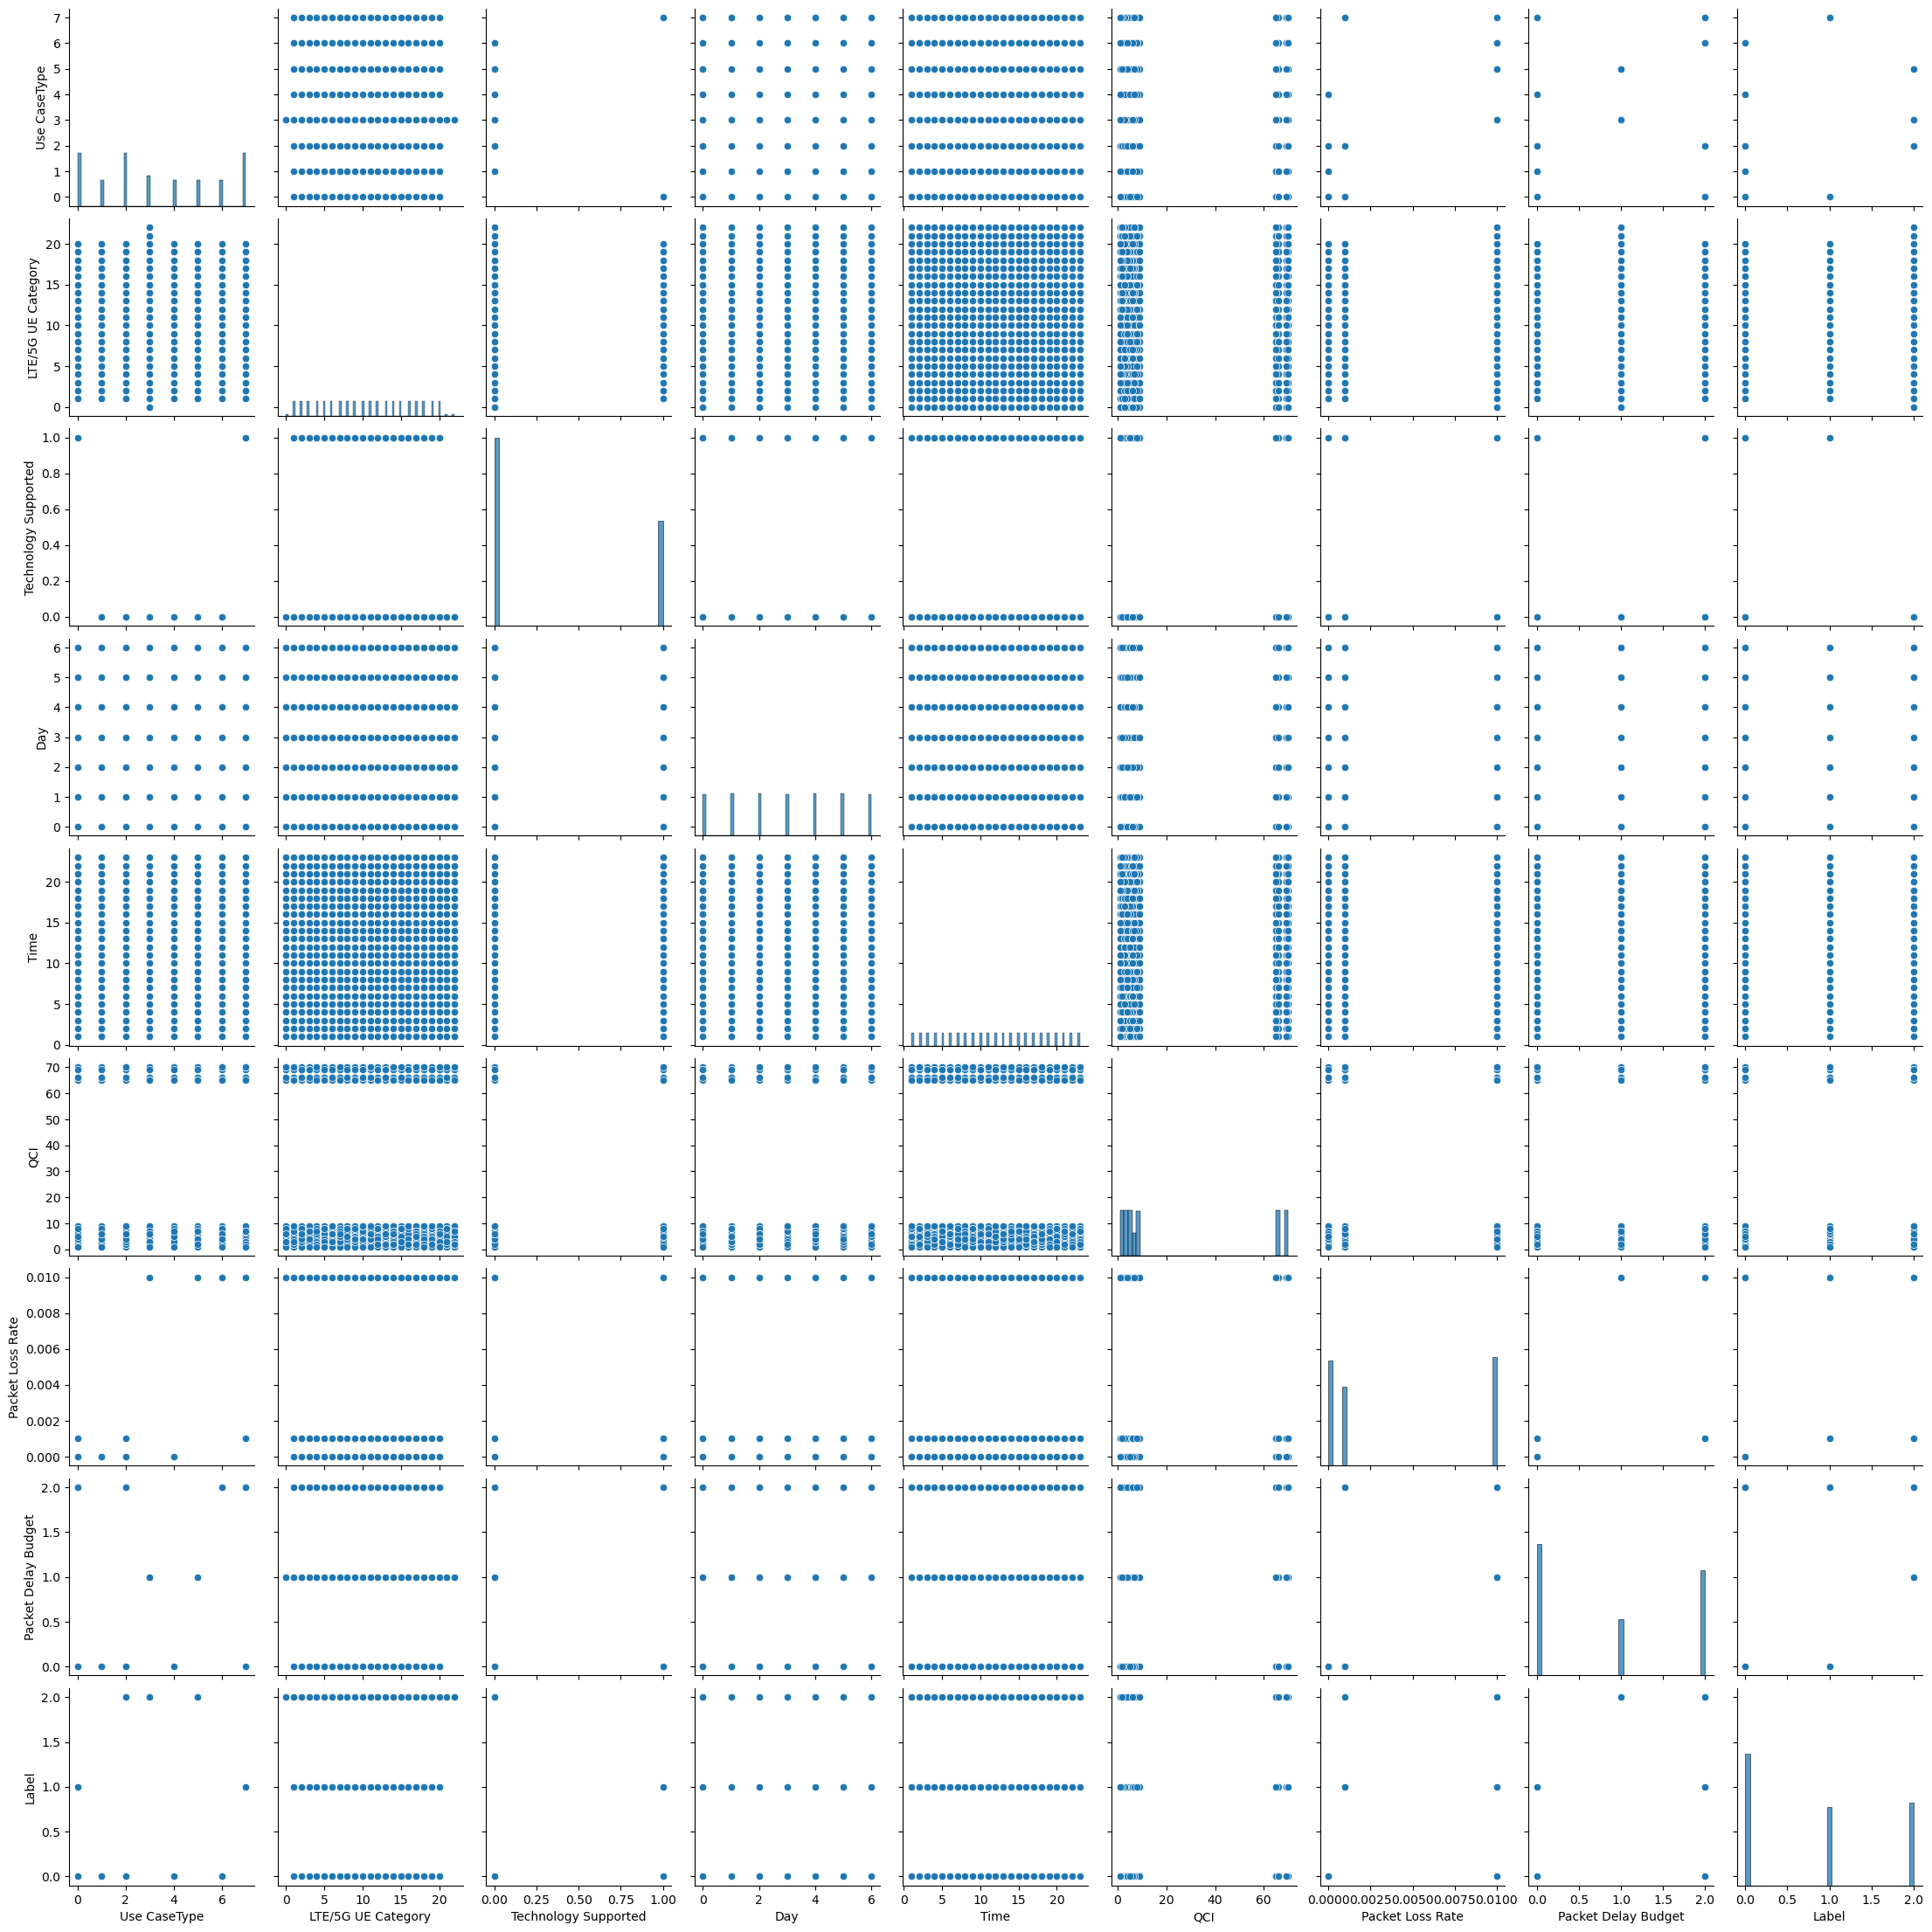

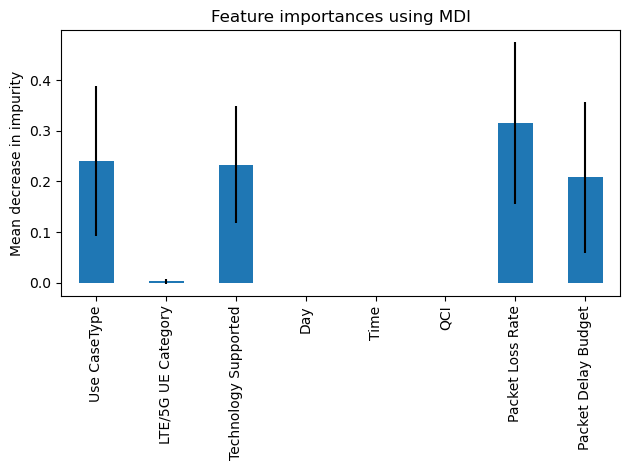

In [13]:
from utils import split_train_test, exploratory_analysis, encode_labels

X_train, X_test, y_train, y_test = split_train_test(df, target_col, test_size=0.2)
le, y_train_onehot, y_test_onehot = encode_labels(y_train, y_test)
exploratory_analysis(X_train, y_train_onehot)

In [14]:
from utils import scale_data
scaler, X_train, X_test = scale_data(X_train, X_test)

In [10]:
from utils import classify_random_forest
classify_random_forest(X_train, X_test, y_train_onehot, y_test_onehot)

Train Accuracy: 0.9099844399034792
Test Accuracy: 0.9116317435831512


In [11]:
from utils import classify_svm
classify_svm(X_train, X_test, y_train_onehot, y_test_onehot)

C:\Users\foxel\anaconda3\envs\EMIA-gpu\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Train Accuracy: 1.0
Test Accuracy: 1.0




Describing pandas dataframe
                         count       mean        std       min       25%  \
LTE/5G UE Category    373391.0  10.555434   5.863672  0.000000  5.000000   
Technology Supported  373391.0   0.359031   0.479717  0.000000  0.000000   
Day                   373391.0   3.000287   1.998514  0.000000  1.000000   
Time                  373391.0  11.990803   6.631771  1.000000  6.000000   
QCI                   373391.0  24.210766  28.940596  1.000000  4.000000   
Packet Loss Rate      373391.0   0.003996   0.004644  0.000001  0.000001   
Packet Delay Budget   373391.0   0.910488   0.893848  0.000000  0.000000   

                         50%    75%    max  
LTE/5G UE Category    11.000  16.00  22.00  
Technology Supported   0.000   1.00   1.00  
Day                    3.000   5.00   6.00  
Time                  12.000  18.00  23.00  
QCI                    7.000  65.00  70.00  
Packet Loss Rate       0.001   0.01   0.01  
Packet Delay Budget    1.000   2.00   2.00  



C:\Users\foxel\anaconda3\envs\EMIA-gpu\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)




Prepare random forest importance
Elapsed time to compute the importances: 0.014 seconds


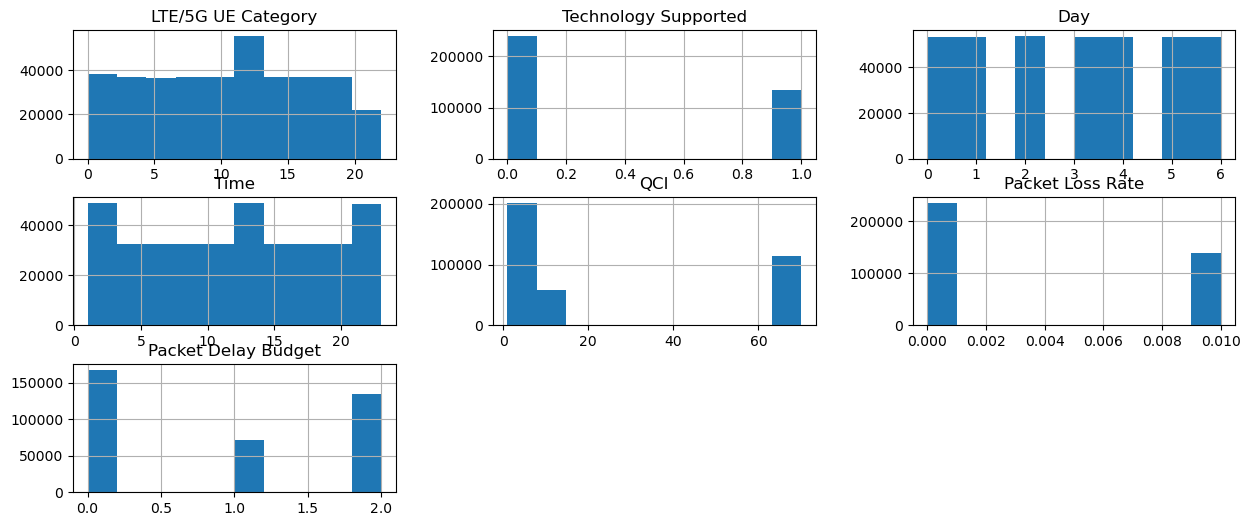

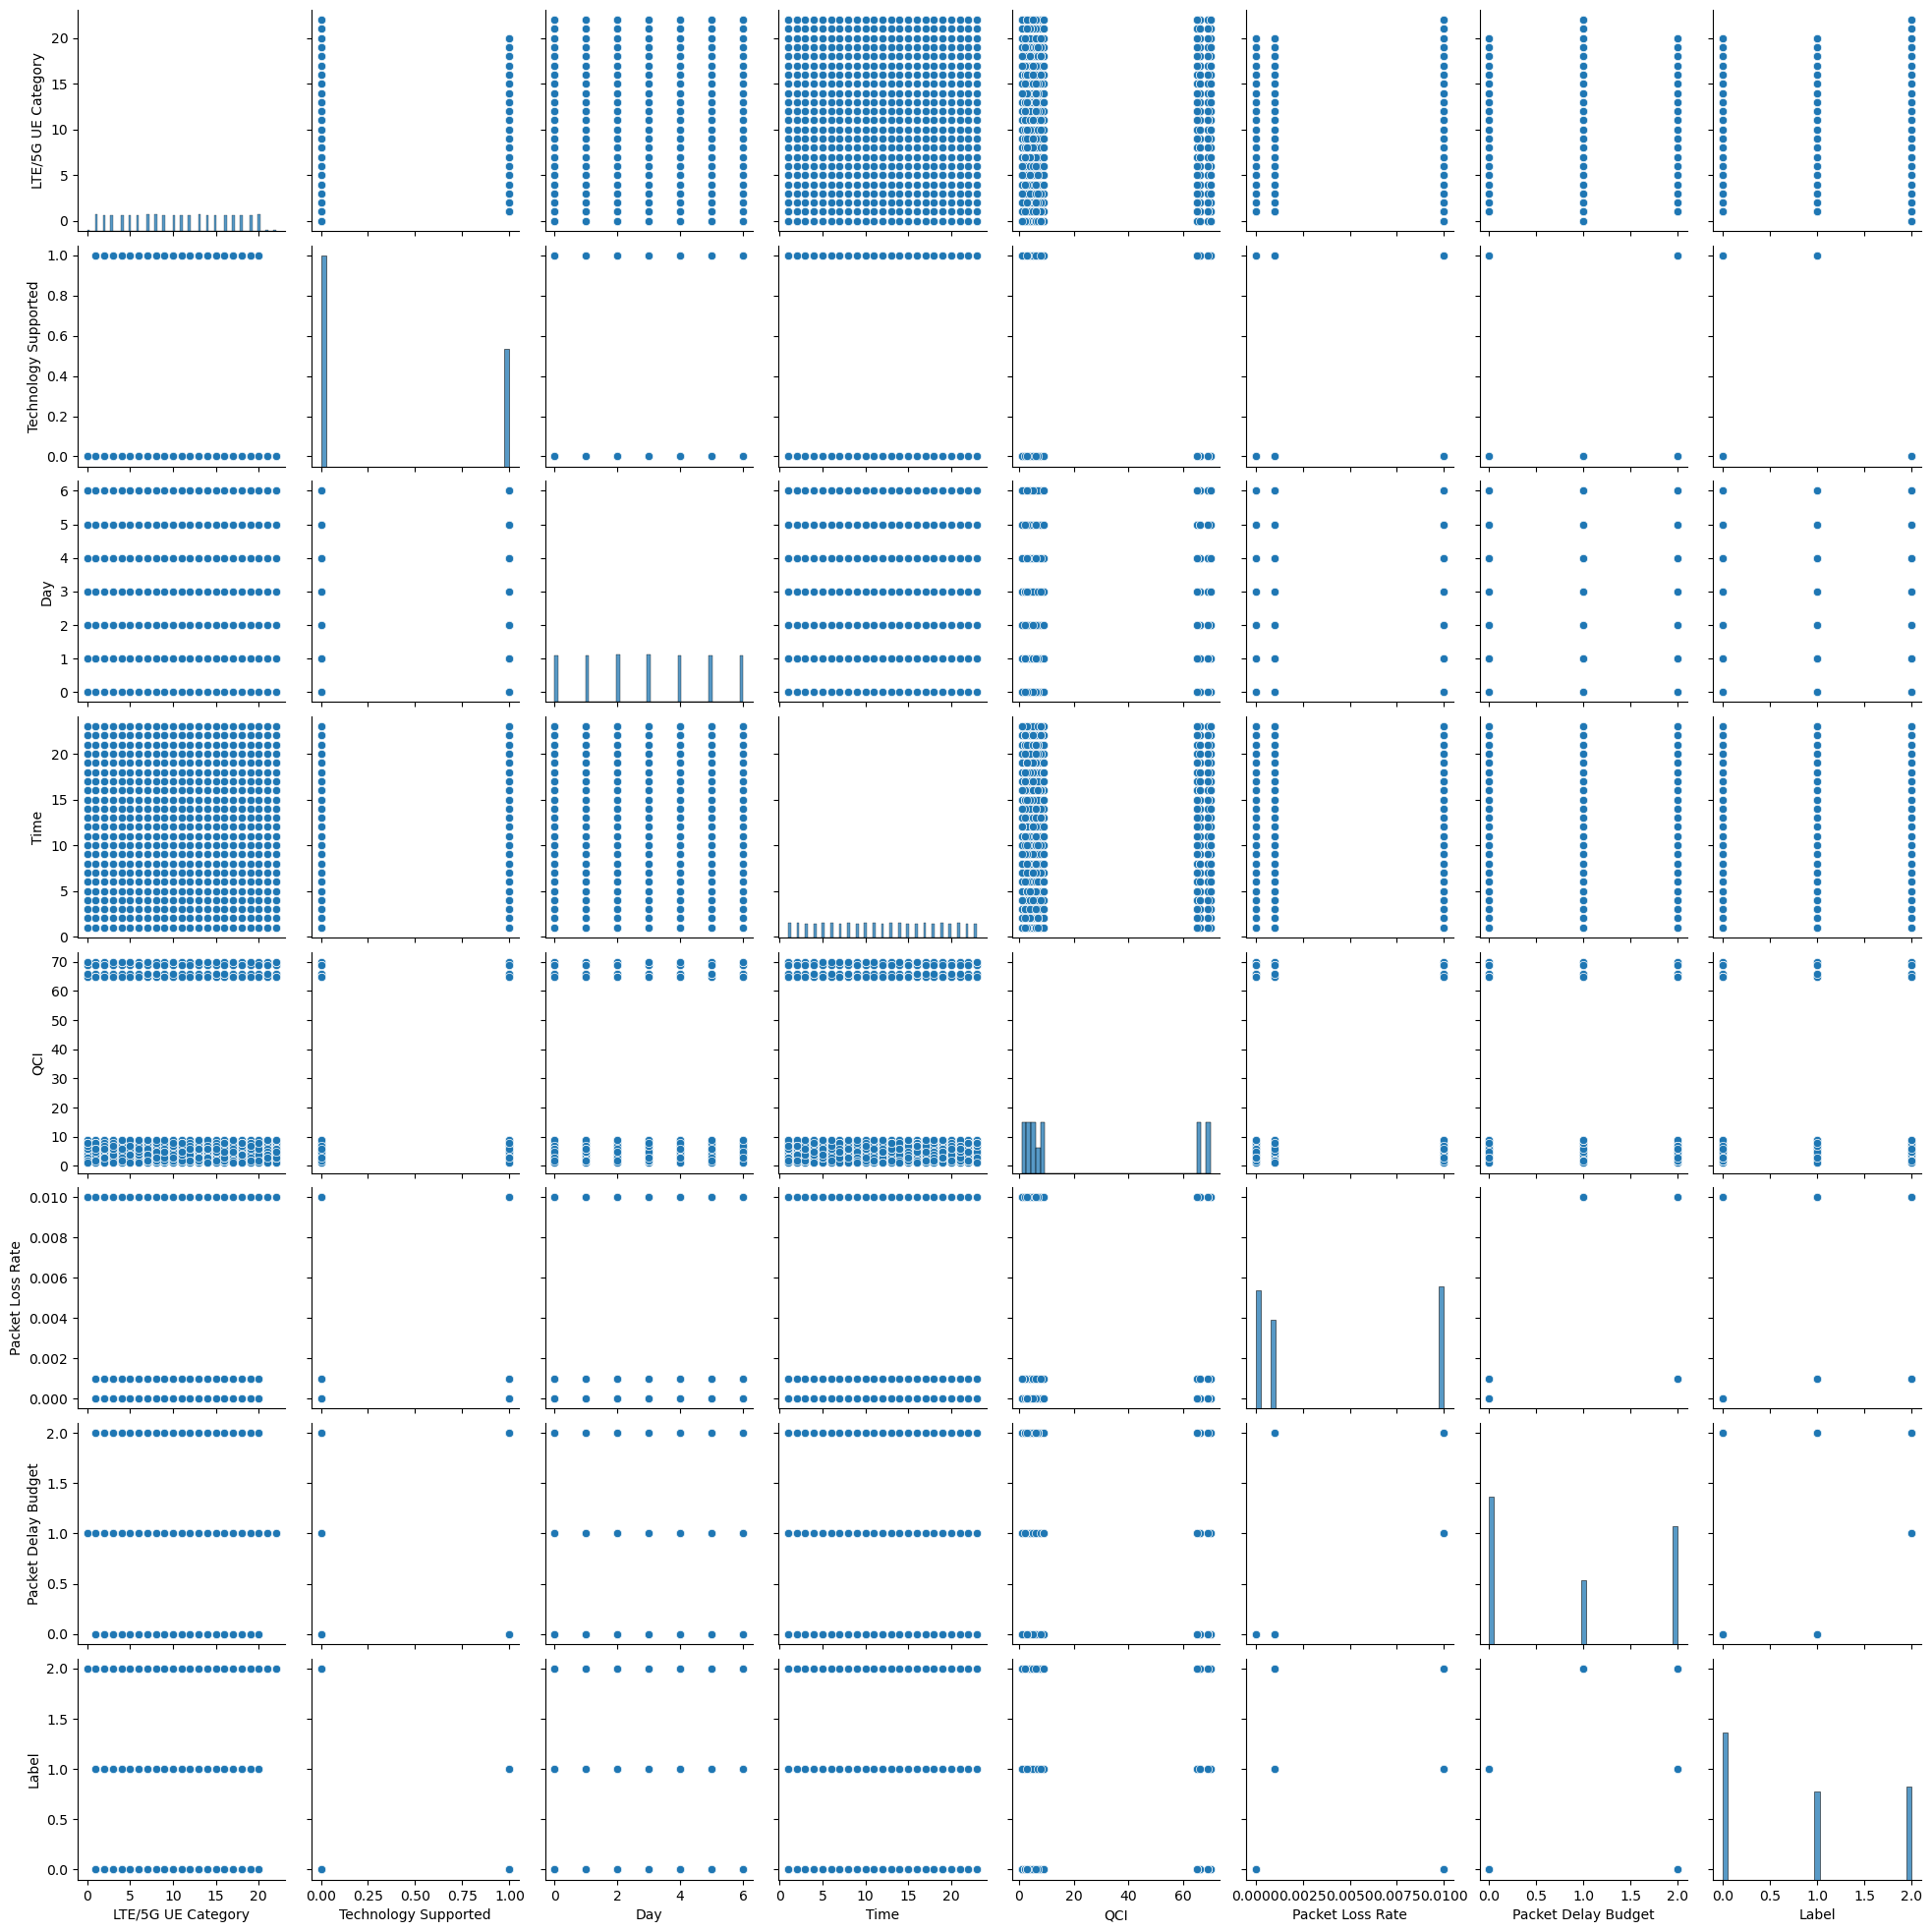

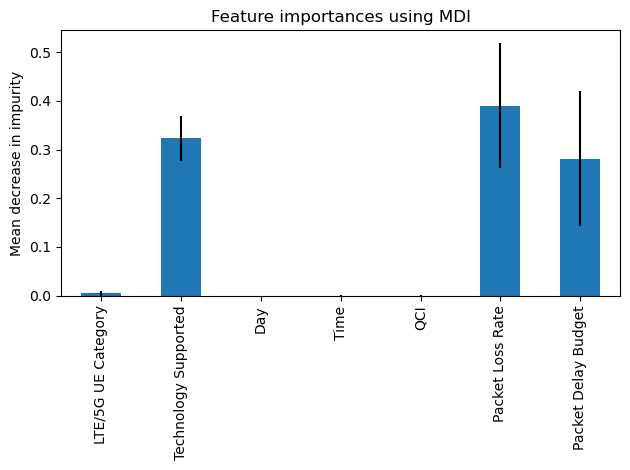

In [15]:
from utils import split_train_test, exploratory_analysis, encode_labels

df_new = df.copy()
df_new.drop(columns=["Use CaseType"], inplace=True)
X_train, X_test, y_train, y_test = split_train_test(df_new, target_col, test_size=0.2)
le, y_train_onehot, y_test_onehot = encode_labels(y_train, y_test)
exploratory_analysis(X_train, y_train_onehot)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                80        
                                                                 
 dense_4 (Dense)             (None, 6)                 66        
                                                                 
 dense_5 (Dense)             (None, 3)                 21        
                                                                 
Total params: 167
Trainable params: 167
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
11669/11669 [==============================] - 32s 3ms/step - loss: 0.3535 - accuracy: 0.8197 - val_loss: 0.2139 - val_accuracy: 0.9087
Epoch 2/10
11669/11669 [==============================] - 31s 3ms/step - loss: 0.1724 - accuracy: 0.9133 - val_loss: 0.1364 - val_accuracy: 0.9346
Epoch 3/10
11669/11669 [==

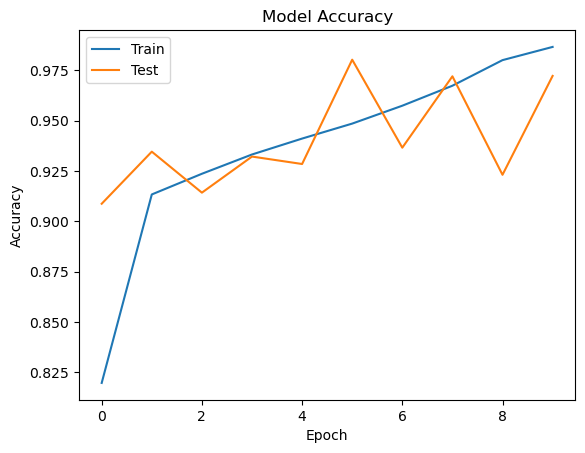

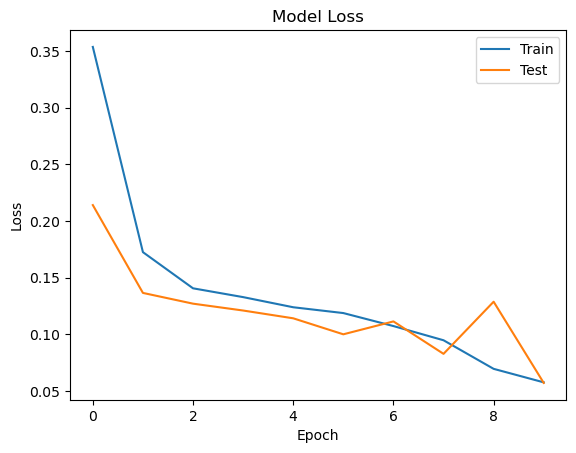

2918/2918 [==============================] - 6s 2ms/step - loss: 0.0570 - accuracy: 0.9722

accuracy: 97.22%


In [16]:
from utils import classify_dnn

classify_dnn(X_train, X_test, y_train, y_test)